<h1> Welcome to the Southern Water Corp Python Case Study!</h1>
<img src = 'https://www.datascienceportfol.io/static/profile_pics/pr2_18705A34E86604A556E9.png' style="width: 100%; height: auto;">

---

# Part I: <span style="color:green">Descriptive Statistics</span>

### Step 1: <span style="color:green">Import Libraries</span> 

## Place your code here

In [39]:
import matplotlib as mpl
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
sns.set_style("darkgrid")
mpl.rcParams['figure.figsize'] = (20,5)

---------------------------------------------------------------------------


### Step 2: <span style="color:green">Descriptive Statistics</span> 
The data received from Southern Water Corp has been split into two files.
The first file, titled DF_Raw_Data contains all the 'raw' Pump Data.
The second file, titled DF_Rolling_Stdev contains the Rolling Standard Deviation Data.


i. Import each of the two data sources and store them into their individual dataframes. 

ii. Print descriptive statistics for each of the dataframes.

In [40]:
dataframe_raw = pd.read_csv('C:/Users/calej/Desktop/Springboard/SWC_Python_Case_Study/DF_Raw_Data.csv')
dataframe_stdev = pd.read_csv('C:/Users/calej/Desktop/Springboard/SWC_Python_Case_Study/DF_Rolling_Stdev.csv')

print('Information for Raw Data:')
print(dataframe_raw.info())

print('Information for Rolling StDev Data:')
print(dataframe_stdev.info())

print('Descriptive Statistics for Raw Data:')
print(dataframe_raw.describe())

print('Descriptive Statistics for Rolling StDev Data:')
print(dataframe_stdev.describe())

Information for Raw Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2453 entries, 0 to 2452
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Data Source              2453 non-null   object 
 1   TIMEFRAME (DD/MM/YYYY)   2453 non-null   object 
 2   Volumetric Flow Meter 1  2453 non-null   float64
 3   Volumetric Flow Meter 2  2453 non-null   float64
 4   Pump Speed (RPM)         2453 non-null   int64  
 5   Pump Torque              2453 non-null   int64  
 6   Ambient Temperature      2453 non-null   int64  
 7   Horse Power              2453 non-null   float64
 8   Pump Efficiency          2453 non-null   float64
 9   PUMP FAILURE (1 or 0)    2453 non-null   int64  
dtypes: float64(4), int64(4), object(2)
memory usage: 191.8+ KB
None
Information for Rolling StDev Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2452 entries, 0 to 2451
Data columns (total 10 columns):
 #   Co

Insight: The rolling_stdev dataset statistics are much lower in magnitude compared to the raw dataset values and indicate smaller, more consistent fluctuations over time rather than the larger, full range of variation present in the raw dataset.

---------------------------------------------------------------------------

### Step 3: <span style="color:green">Create a Boxplot</span> 

When we look at the dataframe, we see the upper and lower quartiles for each row of data from the **.describe** command.

This gives us an understanding of the number of entires in each dataset (~2,452). 

Next up — convert the dataframes into a boxplot :

<H3> <span style="color:green"> Steps for both the dataframe_raw dataset and the dataframe_stdev dataset </span></H3> 

i) Using the dataframe, lets create a boxplot visualising this information.

ii) Using the dataframe, lets create a lineplot visualising this information.

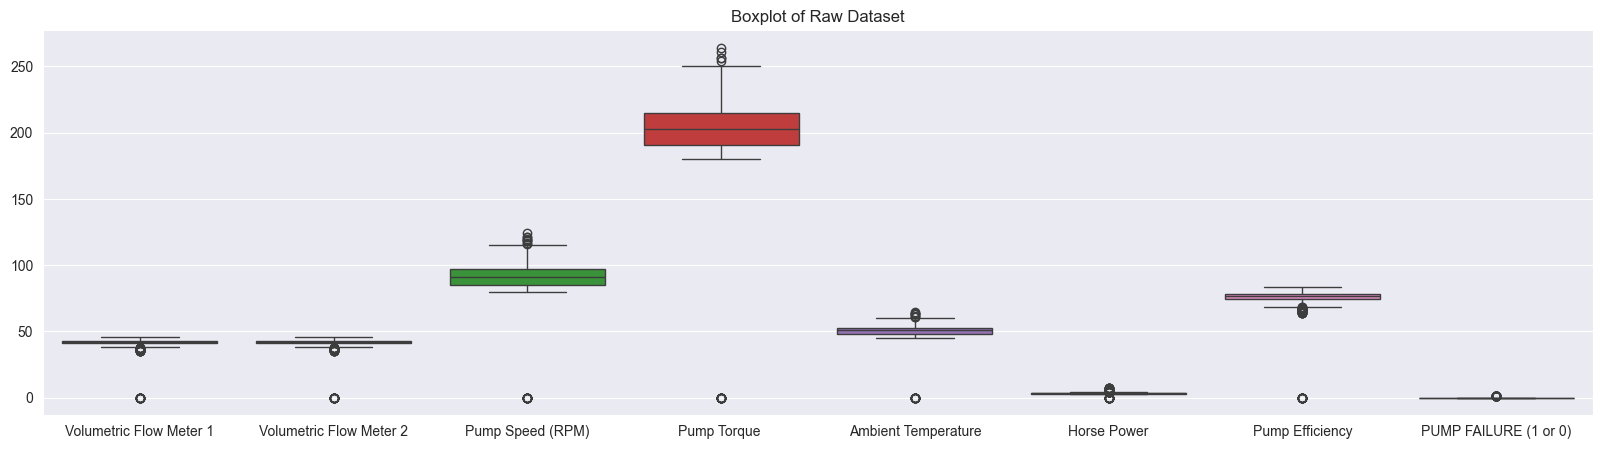

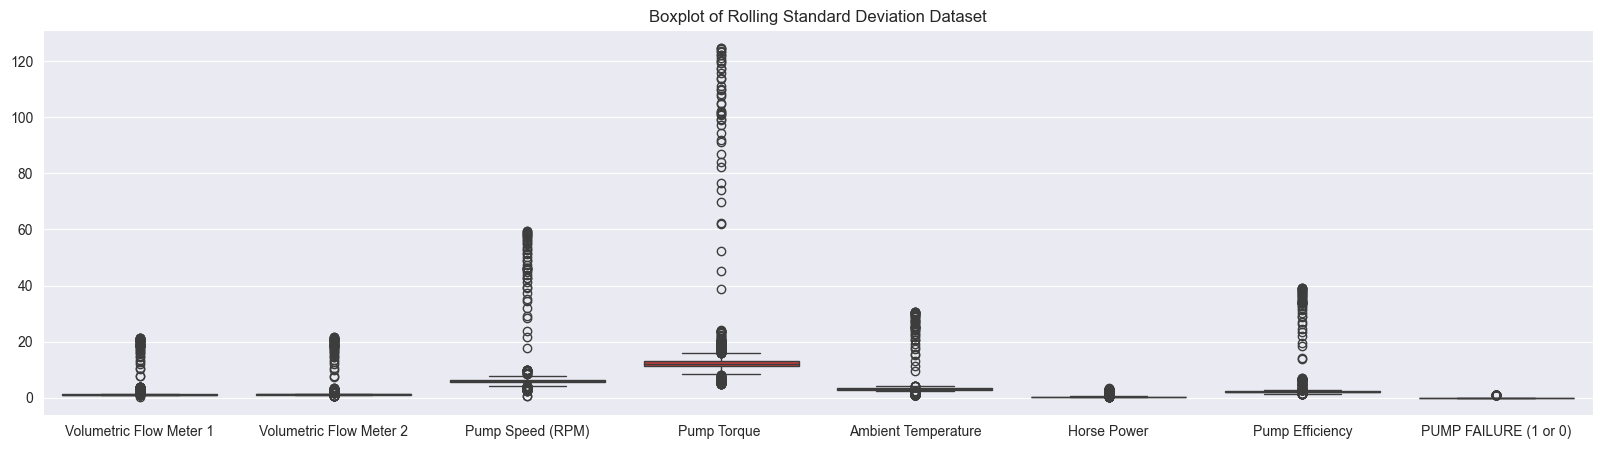

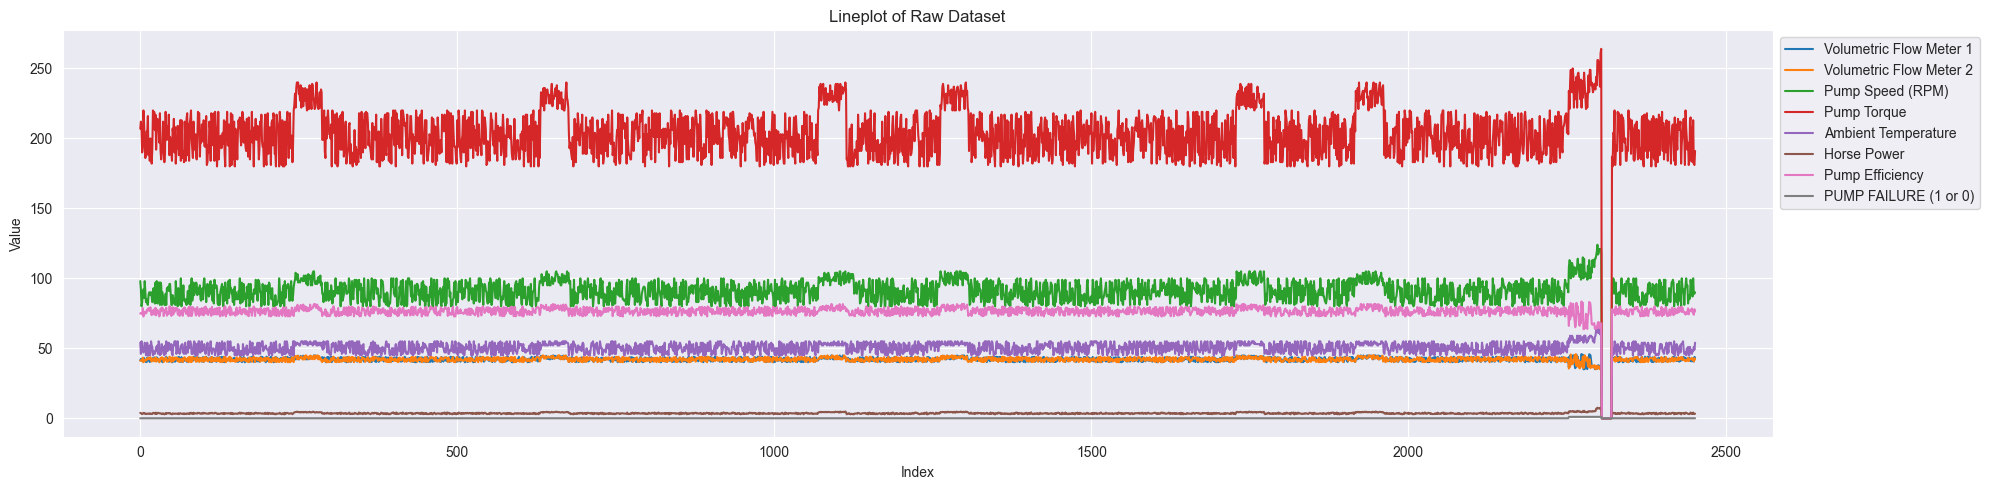

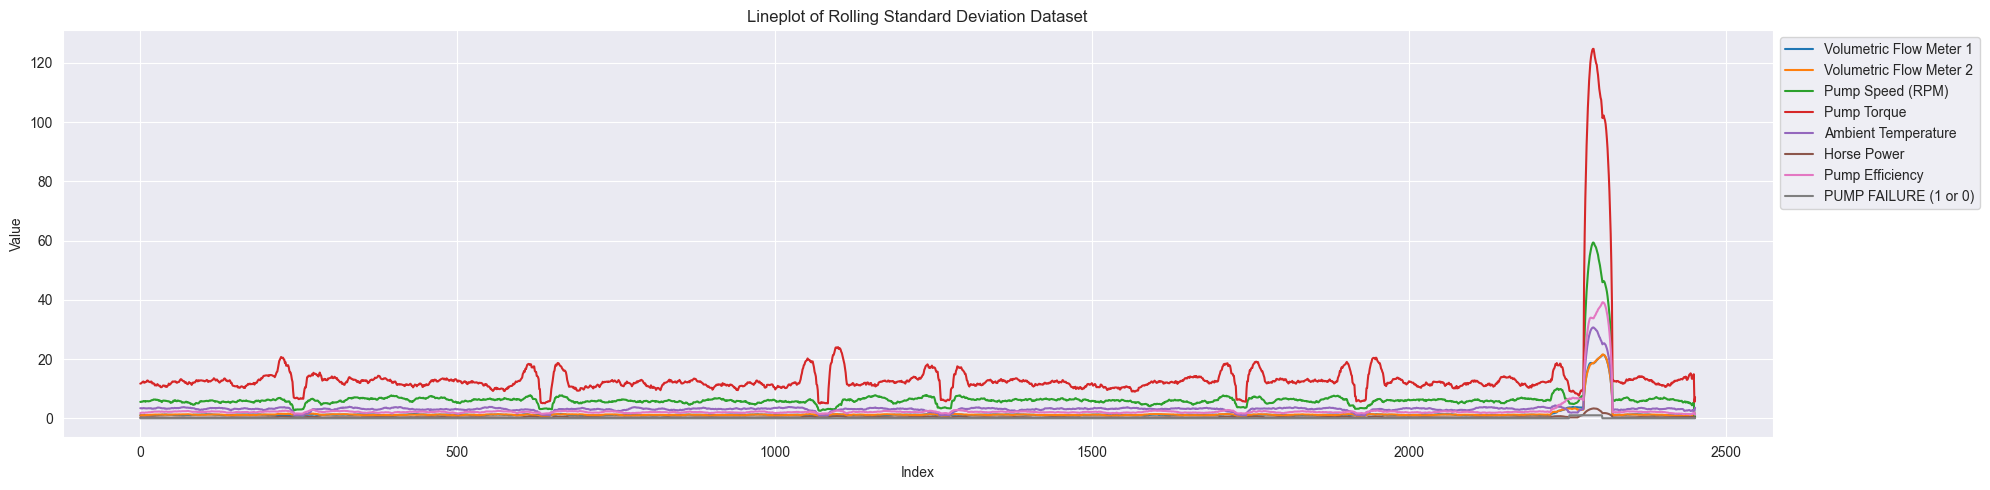

In [41]:
# Boxplot for dataframe_raw
sns.boxplot(data=dataframe_raw)
plt.title('Boxplot of Raw Dataset')
plt.show()

# Boxplot for dataframe_stdev
sns.boxplot(data=dataframe_stdev)
plt.title('Boxplot of Rolling Standard Deviation Dataset')
plt.show()

# Plot all numeric columns
for column in dataframe_raw.select_dtypes(include=['float64','int64']).columns:
    plt.plot(dataframe_raw.index, dataframe_raw[column], label=column)

plt.title('Lineplot of Raw Dataset')
plt.xlabel('Index')
plt.ylabel('Value')

# Place legend outside the plot area
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

# Plot all numeric columns
for column in dataframe_stdev.select_dtypes(include=['float64','int64']).columns:
    plt.plot(dataframe_stdev.index, dataframe_stdev[column], label=column)

plt.title('Lineplot of Rolling Standard Deviation Dataset')
plt.xlabel('Index')
plt.ylabel('Value')

# Place legend outside the plot area
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

**What have we observed from the boxplot and line plots for both the dataframe_raw and dataframe_stdev datasets?**

The boxplots reveal that the raw dataset exhibits a wider spread with some potential outliers, while the rolling standard deviation dataset shows a much narrower range, showing more localized fluctuations. The line plots further illustrate that the raw dataset has a broader variance over time, whereas the rolling standard deviation dataset consistently captures smaller, more localized variability patterns with a strong shift towards the end of the lineplot.

---------------------------------------------------------------------------

---------------------------------------------------------------------------

### Step 4: <span style="color:green">Filtered Dataframes with Box Plots</span> 

The datasets we have contain a Pump Failure (1 or 0) Variable that indicate whether the Pump is Failing (1) or whether the Pump is behaving normally (0).  
    
It is very likely we will see differences in the overall populations of Pre-Failure vs. Post Failure.
To visualise this difference, we should separate our datasets, filtering for when the Pump Failure is = 0 or when the Pump Failure =1 and see what trends emerge. 
    
This will require us to <b> SUBSET </b> the dataframe using *boolean filters*.
    
<H3> <span style="color:green"> Steps for both the dataframe_raw dataset and the dataframe_stdev dataset </span></H3> 

i) Using the dataframe_raw dataset, lets create two boxplots specifically for when the Pump has failed (i.e. Pump Failure = 1)  and 0 (Pump is in normal operations). 


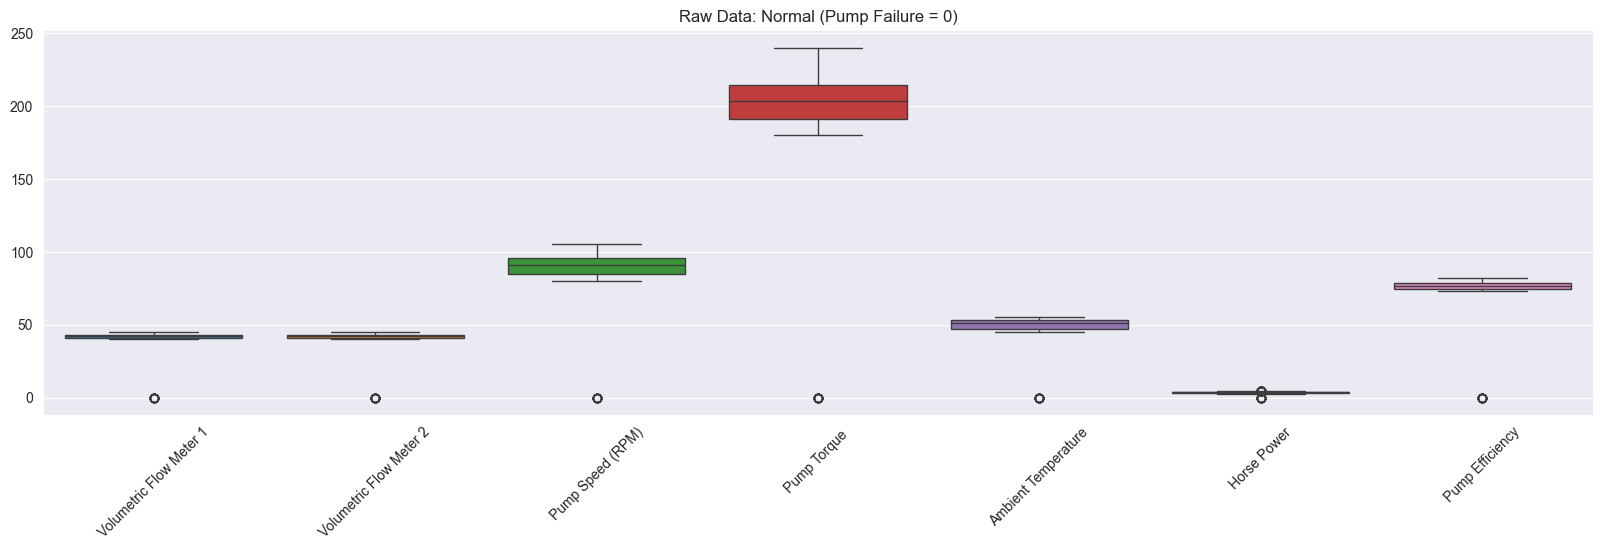

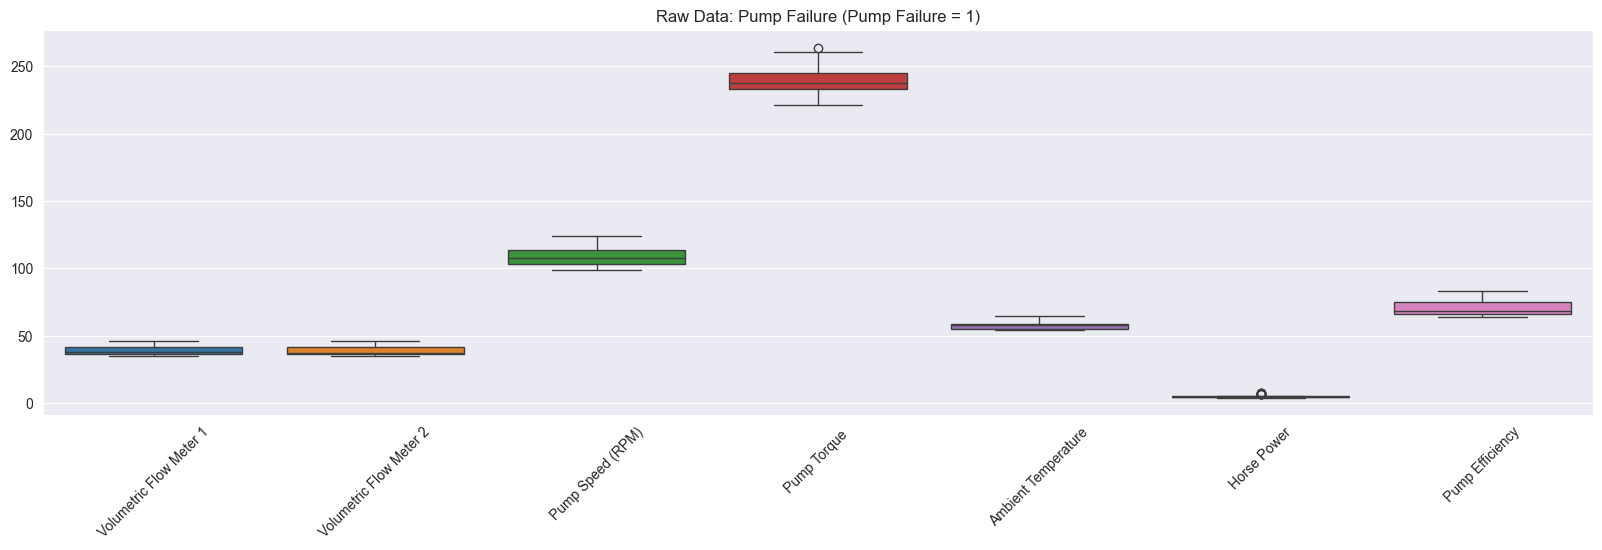

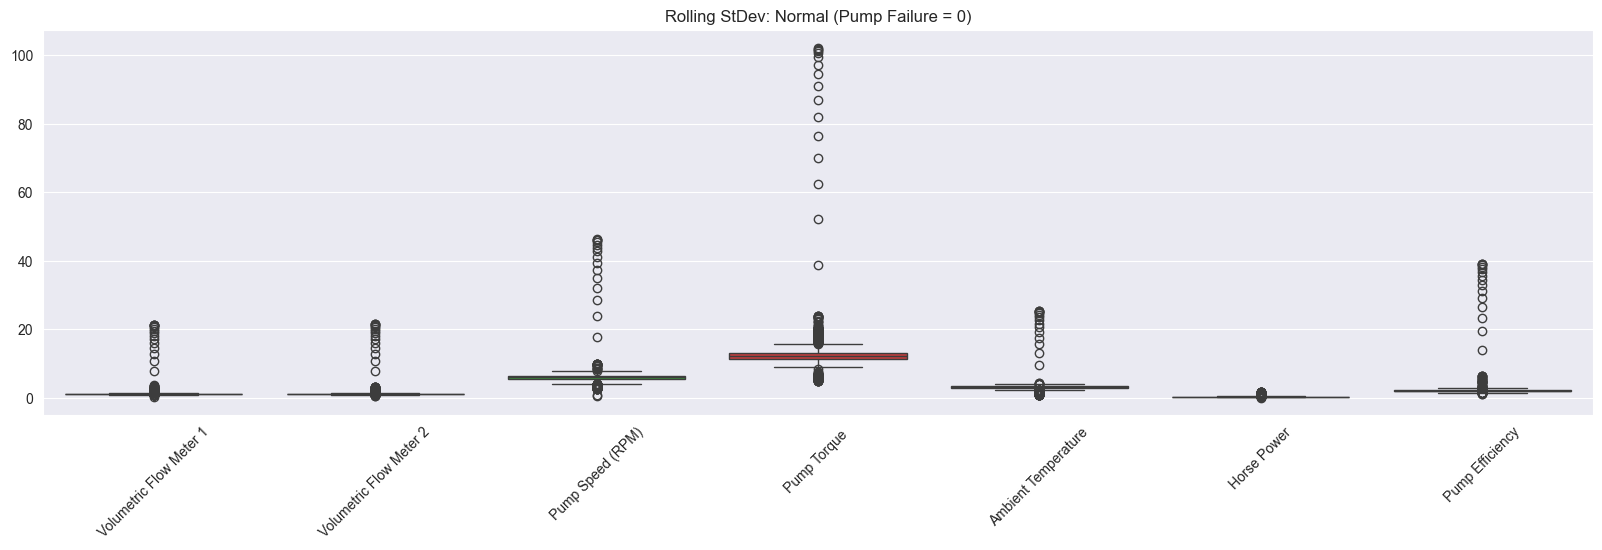

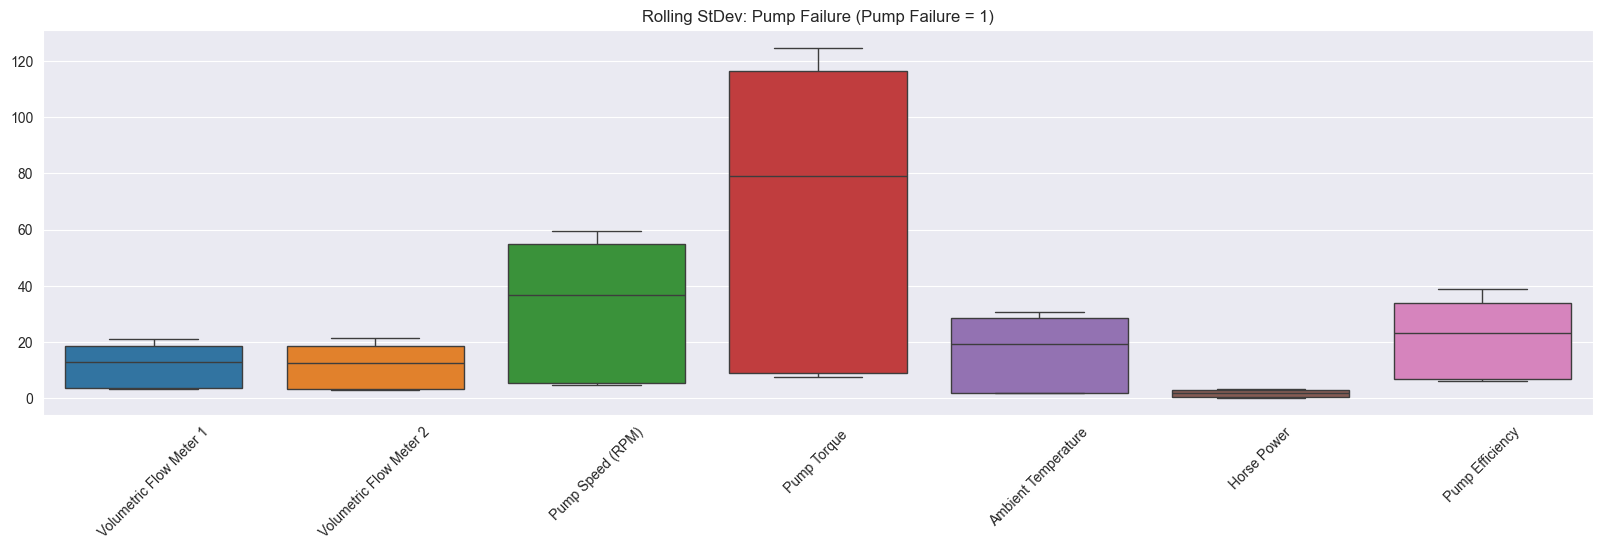

Raw Data - Normal: 2401 records
Raw Data - Failure: 52 records
StDev Data - Normal: 2400 records
StDev Data - Failure: 52 records


In [42]:
# Filter conditions for raw data
condition_normal = dataframe_raw['PUMP FAILURE (1 or 0)'] == 0
condition_failure = dataframe_raw['PUMP FAILURE (1 or 0)'] == 1

# Create filtered dataframes for raw data
df_raw_normal = dataframe_raw[condition_normal]
df_raw_failure = dataframe_raw[condition_failure]

# Create boxplots for raw data - normal 
sns.boxplot(data=df_raw_normal.select_dtypes(include=['float64', 'int64']).drop('PUMP FAILURE (1 or 0)', axis=1))
plt.title('Raw Data: Normal (Pump Failure = 0)')
plt.xticks(rotation=45)
plt.show()

# Create boxplots for raw data - failure
sns.boxplot(data=df_raw_failure.select_dtypes(include=['float64', 'int64']).drop('PUMP FAILURE (1 or 0)', axis=1))
plt.title('Raw Data: Pump Failure (Pump Failure = 1)')
plt.xticks(rotation=45)
plt.show()

# Filter conditions for stdev data
condition_normal_stdev = dataframe_stdev['PUMP FAILURE (1 or 0)'] == 0
condition_failure_stdev = dataframe_stdev['PUMP FAILURE (1 or 0)'] == 1

# Create filtered dataframes for stdev data
df_stdev_normal = dataframe_stdev[condition_normal_stdev]
df_stdev_failure = dataframe_stdev[condition_failure_stdev]

# Create boxplots for stdev data - normal
sns.boxplot(data=df_stdev_normal.select_dtypes(include=['float64', 'int64']).drop('PUMP FAILURE (1 or 0)', axis=1))
plt.title('Rolling StDev: Normal (Pump Failure = 0)')
plt.xticks(rotation=45)
plt.show()

# Create boxplots for stdev data - failure
sns.boxplot(data=df_stdev_failure.select_dtypes(include=['float64', 'int64']).drop('PUMP FAILURE (1 or 0)', axis=1))
plt.title('Rolling StDev: Pump Failure (Pump Failure = 1)')
plt.xticks(rotation=45)
plt.show()

# Print the number of records in each condition
print(f"Raw Data - Normal: {len(df_raw_normal)} records")
print(f"Raw Data - Failure: {len(df_raw_failure)} records")
print(f"StDev Data - Normal: {len(df_stdev_normal)} records")
print(f"StDev Data - Failure: {len(df_stdev_failure)} records")

<h3> What have we noticed when you compared the dataset in this manner? </h3>

When comparing normal operations to failure conditions, there are notably higher values and greater variability in pump parameters (especially in torque, speed, and efficiency) during failure events, with the rolling standard deviation data showing particularly pronounced spikes in variability during these failure periods.

---------------------------------------------------------------------------

Now a quick analysis might show-case there are many *outliers* that exist in our dataset.

As we all know, Outliers can easily *skew* our analysis and we might want to remove them.

Let's experiment with removing Outliers with the following steps:

The general logic for removing an outliers is:

<b> Any Value that is either Q1 - 1.5x IQR or greater than Q3 + 1.5x IQR is considered an outlier. </b>

Where Q1 = Quartile 1 and Q3 = Quartile 3

Let's break these down to a few simple steps and tackle how to calculate this.

<b>

    1. Define the Quartiles Q1 and Q3. 
    
    2. Calculate the Interquartile Range (Q3 - Q1)
    
    3. Create two new variables; Lower_Range (Q1 - 1.5x IQR) and Upper_Range ( Q3 + 1.5x IQR).
    
    4. Using Boolean Subsetting, filter the Dataframe for Outliers and remove them
    
    5. Calculate what the proportion of Outliers exist (i.e. Number of entries left after Outlier removal / Number of total entries in dataset) 

</b>

### Step 5: <span style="color:green">Create Quartiles</span> 

Lets create two new variables called Q1 and Q3 using the dataframe_raw dataset. 

i) Q1 should contain the <b> 25th percentile for all columns in the dataframe while Q3 should contain the 75th percentile </b> for all the columns in the dataframe.

ii) After defining Q1 and Q3, calculate the interquartile range **(IQR = Q3 - Q1)** for all columns in the dataframe and print it to the screen.

In [43]:
# Remove the 'PUMP FAILURE (1 or 0)' column and non-numeric columns for calculations
numeric_columns = dataframe_raw.select_dtypes(include=['float64', 'int64']).drop('PUMP FAILURE (1 or 0)', axis=1)

# Calculate Q1 and Q3 for numeric columns
Q1 = numeric_columns.quantile(0.25)
Q3 = numeric_columns.quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1

# Print the results
print('Q1 (25th percentile):')
print(Q1)
print('Q3 (75th percentile):')
print(Q3)
print('Interquartile Range (IQR):')
print(IQR)

Q1 (25th percentile):
Volumetric Flow Meter 1     41.05
Volumetric Flow Meter 2     41.00
Pump Speed (RPM)            85.00
Pump Torque                191.00
Ambient Temperature         48.00
Horse Power                  3.22
Pump Efficiency             74.56
Name: 0.25, dtype: float64
Q3 (75th percentile):
Volumetric Flow Meter 1     43.14
Volumetric Flow Meter 2     43.13
Pump Speed (RPM)            97.00
Pump Torque                215.00
Ambient Temperature         53.00
Horse Power                  3.78
Pump Efficiency             78.47
Name: 0.75, dtype: float64
Interquartile Range (IQR):
Volumetric Flow Meter 1     2.09
Volumetric Flow Meter 2     2.13
Pump Speed (RPM)           12.00
Pump Torque                24.00
Ambient Temperature         5.00
Horse Power                 0.56
Pump Efficiency             3.91
dtype: float64


---------------------------------------------------------------------------

### Step 6: <span style="color:green">Identify Outliers</span> 

Continuing in from Step 5 - we still need to calculate how we can remove our outliers.

We're aware of the overall formula as shown per below.

<b> Outlier = Q1 - 1.5x IQR OR Q3 + 1.5x IQR </b>

Now let's work out how we can identify these Outliers step by step. 

<b> i) Define two new variables, Lower_Limit and Upper_Limit can be calculated as:</b>
<p>
<li> Lower_Limit = Q1 - 1.5 * IQR </li>
<li> Upper_Limit = Q3 + 1.5 * IQR </li> 
   
<b> ii) Using Lower_Limit and Upper_Limit with an OR (|) condition, filter the dataframe to include *only* the Outliers. How many Outliers do we have?</b>

<b> iii) What is the percentage of data that remains after we've removed the Outliers from the dataframe_raw dataset?</b>
    

In [44]:
# Calculate Lower and Upper Limits
lower_Limit = Q1 - 1.5 * IQR
upper_Limit = Q3 + 1.5 * IQR

print('Lower Limits:')
print(lower_Limit)
print('Upper Limits:')
print(upper_Limit)

# Identify outliers
Outliers = dataframe_raw[((dataframe_raw[IQR.index] < lower_Limit) | (dataframe_raw[IQR.index] > upper_Limit)).any(axis=1)]

# Calculate statistics about outliers
total_records = len(dataframe_raw)
outlier_records = len(Outliers)
non_outlier_records = total_records - outlier_records
percentage_remaining = (non_outlier_records / total_records) * 100

print('Outliers:')
print(f'Total records: {total_records}')
print(f'Number of outliers: {outlier_records}')
print(f'Records remaining after outlier removal: {non_outlier_records}')
print(f'Percentage of data remaining: {percentage_remaining:.2f}%')

Lower Limits:
Volumetric Flow Meter 1     37.915
Volumetric Flow Meter 2     37.805
Pump Speed (RPM)            67.000
Pump Torque                155.000
Ambient Temperature         40.500
Horse Power                  2.380
Pump Efficiency             68.695
dtype: float64
Upper Limits:
Volumetric Flow Meter 1     46.275
Volumetric Flow Meter 2     46.325
Pump Speed (RPM)           115.000
Pump Torque                251.000
Ambient Temperature         60.500
Horse Power                  4.620
Pump Efficiency             84.335
dtype: float64
Outliers:
Total records: 2453
Number of outliers: 91
Records remaining after outlier removal: 2362
Percentage of data remaining: 96.29%


<b> Now that we've removed the Outliers and discovered you still have a significant amount of data left - do you think removing Outliers is problematic or not? </b> 

Given that we still retain 96.29% of the data after outlier removal (only losing 91 records out of 2,453), removing outliers in this case appears to be a reasonable approach as it will help reduce the impact of extreme values while maintaining the vast majority of our data.

---------------------------------------------------------------------------

### Step 7: <span style="color:green">Create a Boxplot without Outliers</span> 

i) Lets create a new dataframe called no_outliers and using the ~ operator, remove all the Outliers from the dataframe <p>
ii) Using the no_outliers dataframe, create two box plots as per below: <p>
    <li> A boxplot when PUMP FAILURE is 1 (Failure) </li>
    <li> A boxplot when PUMP FAILURE is 0 (Normal Behaviour) </li> 

<b> Did any of our plots reveal nothing to plot? </b>

Number of records in dataframe_raw: 2453
Number of records in no_outliers: 2362
Number of records without outliers - Normal:  2358
Number of records without outliers - Failure:  4


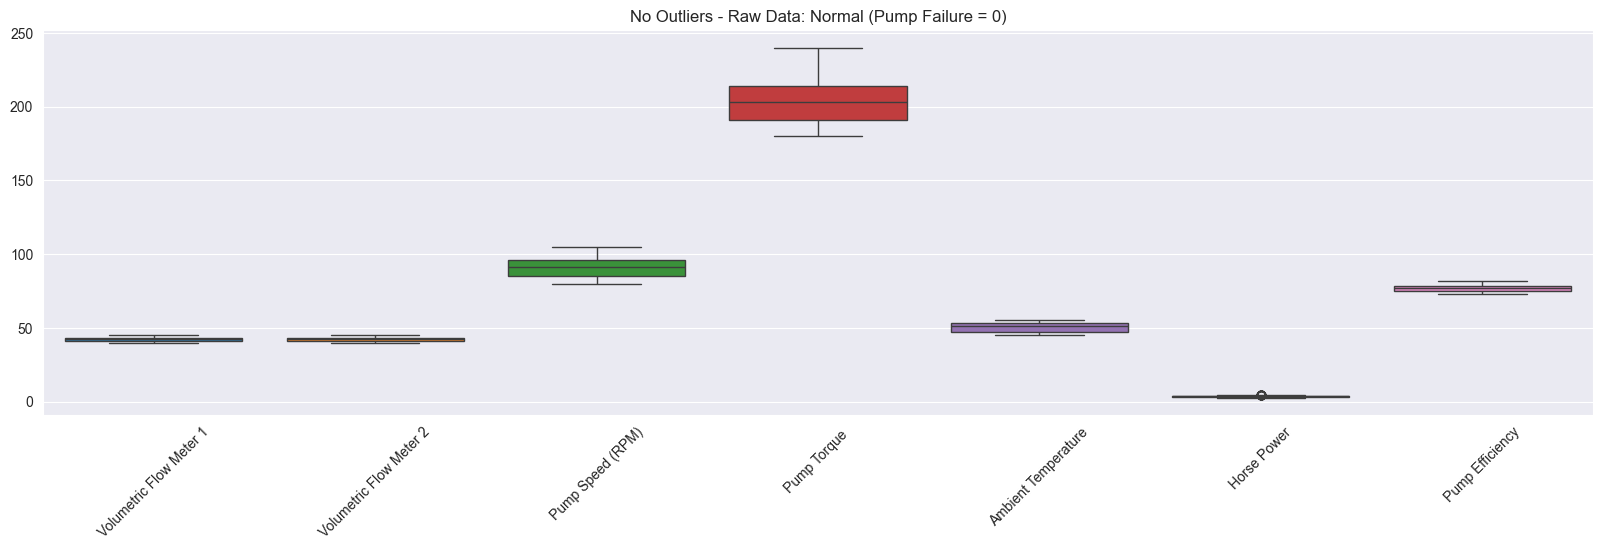

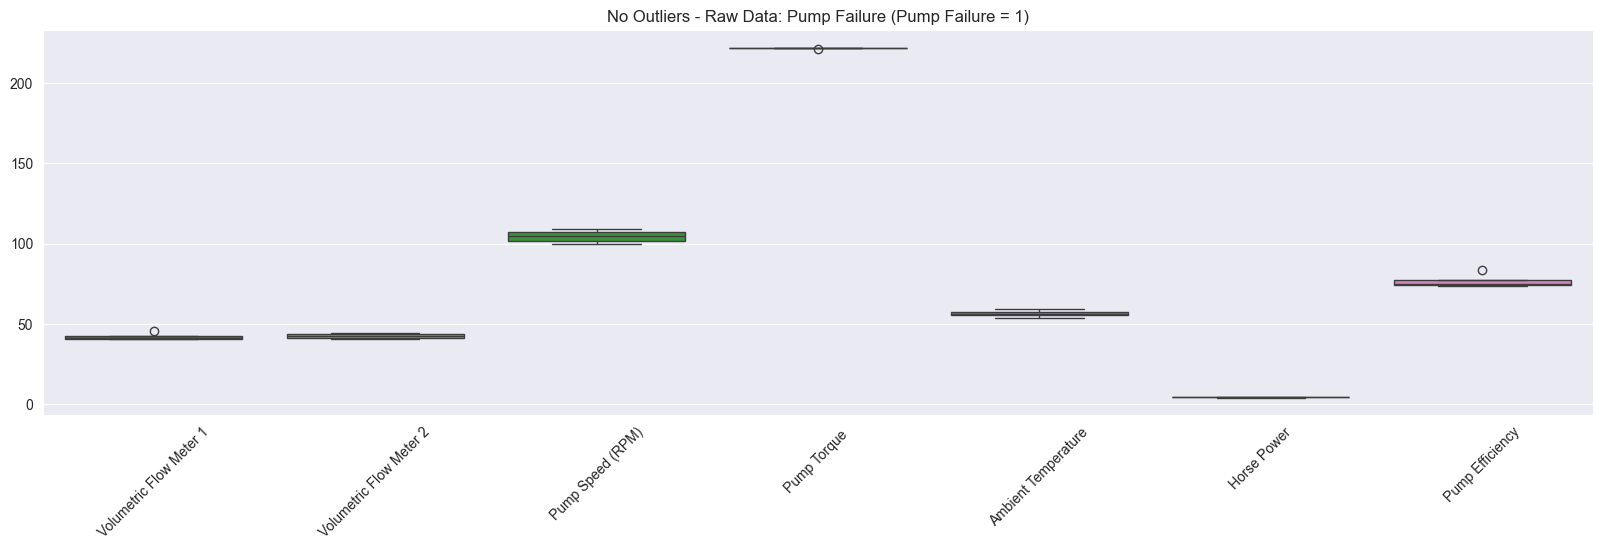

In [45]:
# Create a new dataframe with outliers removed using the ~ operator
no_outliers = dataframe_raw[~(((dataframe_raw[IQR.index] < lower_Limit) | (dataframe_raw[IQR.index] > upper_Limit)).any(axis=1))]

print('Number of records in dataframe_raw:', len(dataframe_raw))
print('Number of records in no_outliers:', len(no_outliers))

# Filter for pump failure conditions in the no_outliers dataframe
no_outliers_normal = no_outliers[~(no_outliers['PUMP FAILURE (1 or 0)'] != 0)]
no_outliers_failure = no_outliers[~(no_outliers['PUMP FAILURE (1 or 0)'] != 1)]

print('Number of records without outliers - Normal: ', len(no_outliers_normal))
print('Number of records without outliers - Failure: ', len(no_outliers_failure))

# Create boxplot for normal operations without outliers
sns.boxplot(data=no_outliers_normal.select_dtypes(include=['float64', 'int64']).drop('PUMP FAILURE (1 or 0)', axis=1))
plt.title('No Outliers - Raw Data: Normal (Pump Failure = 0)')
plt.xticks(rotation=45)
plt.show()

# Create boxplot for failure conditions without outliers
sns.boxplot(data=no_outliers_failure.select_dtypes(include=['float64', 'int64']).drop('PUMP FAILURE (1 or 0)', axis=1))
plt.title('No Outliers - Raw Data: Pump Failure (Pump Failure = 1)')
plt.xticks(rotation=45)
plt.show()

### Step 8: <span style="color:green">Plot and Examine Each Column</span> 



As we might recall from the earlier plot we had made with the line plot; it was hard to see which variables were the most significant with respect to pump failure when all the variables are plotted together. This is common when variables are at different scales, the trends can be more challenging to interpret. This is why we are going to ITERATE through the dataframe and plot each individual variable out and compare this with the Pump Failure for a more streamlined analysis.

This will require us to make use of the following syntax:

1. Define a list variable called `ListOfVariables`; this is to contain the column names of all the **numerical** variables we wish to iterate through in the `dataframe_raw` dataset <p>

2. Instantiate our for loop with the following syntax: 
       
            for item in ListOfVariables:
            first_axis = dataframe[___].plot #We are looping through every item in the dataframe.
            second_axis = first_axis.twinx() #The Twinx function is used to ensure we share the X-Axis for both plots
            second_axis.plot(dataframe['ColumnOfInterest'], color='teal')
            plt.title(item)
            plt.show()
        
<b> i) Using the syntax provided, loop through the dataframe_raw dataset, plotting every variable individually, against the Pump Failure to better identify trends. </b>

**Note:** For each plot, ensure that you have a dual axis set up so you can see the Pump Failure (0 or 1) on the second Y-axis, and the attribute on the first Y-Axis. 


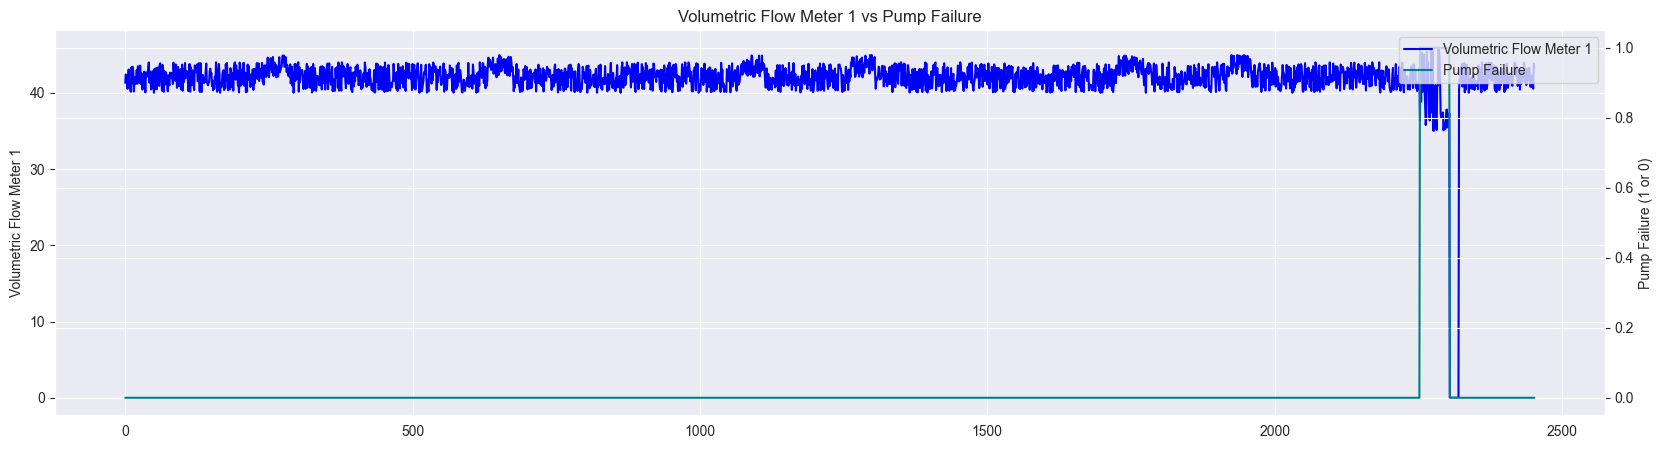

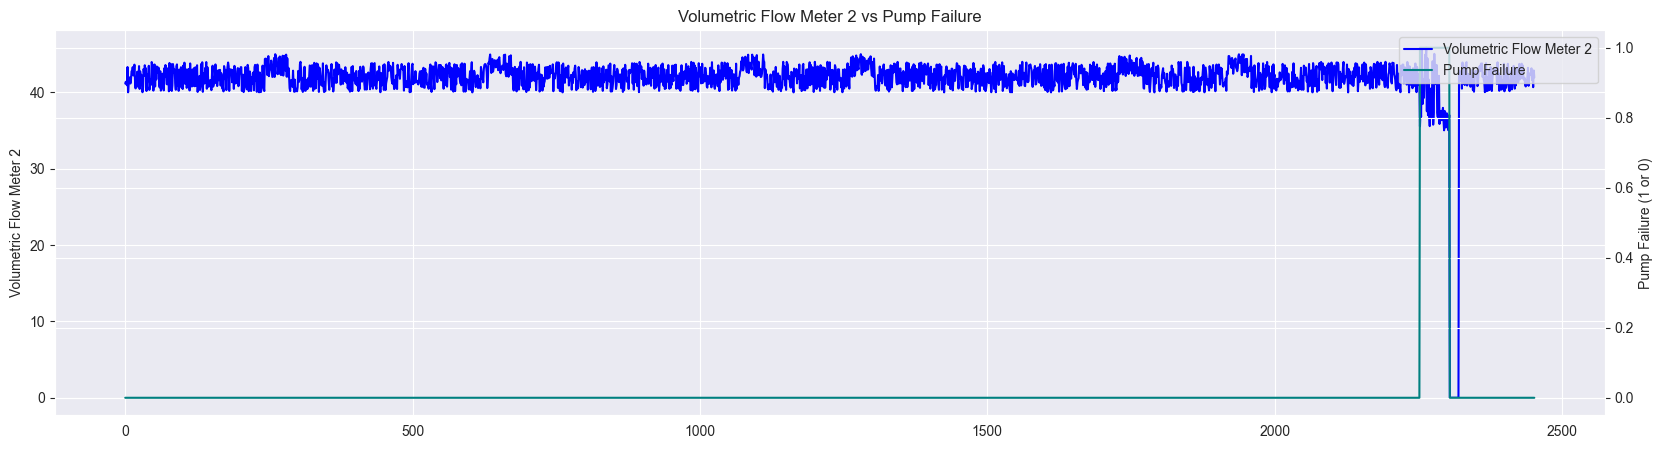

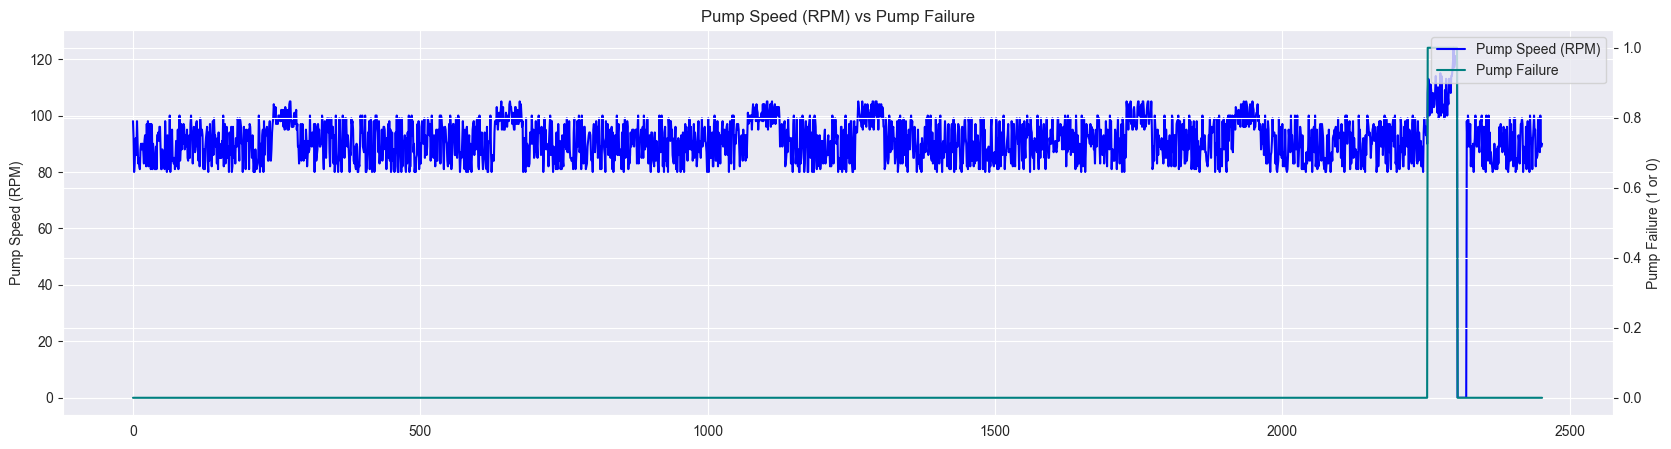

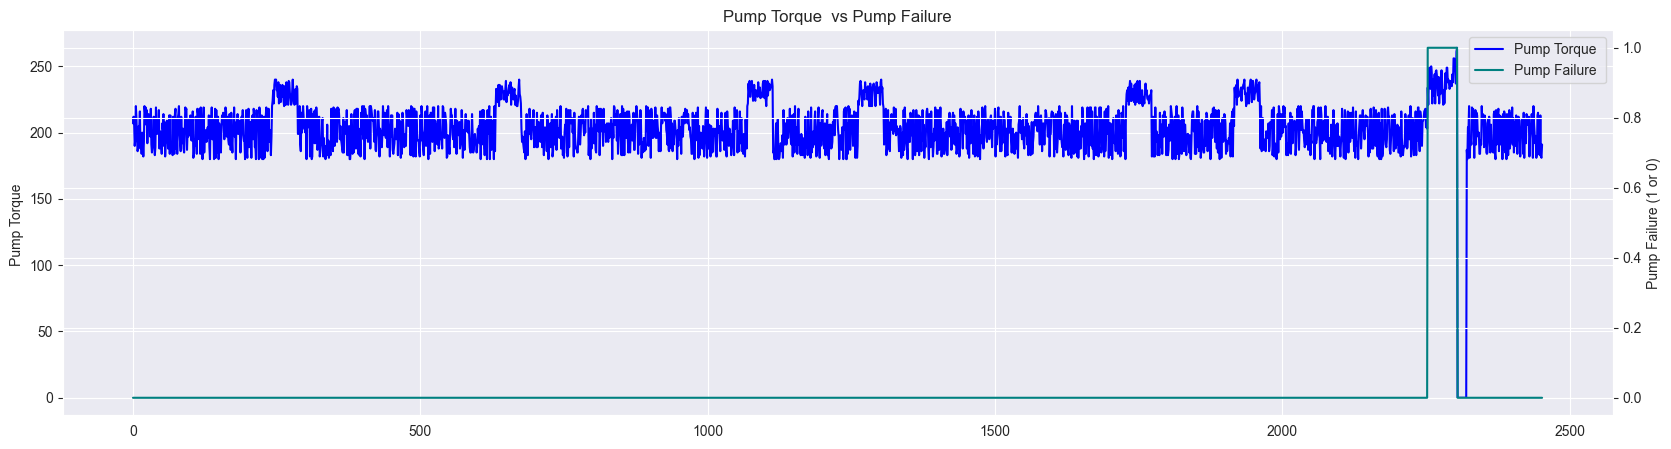

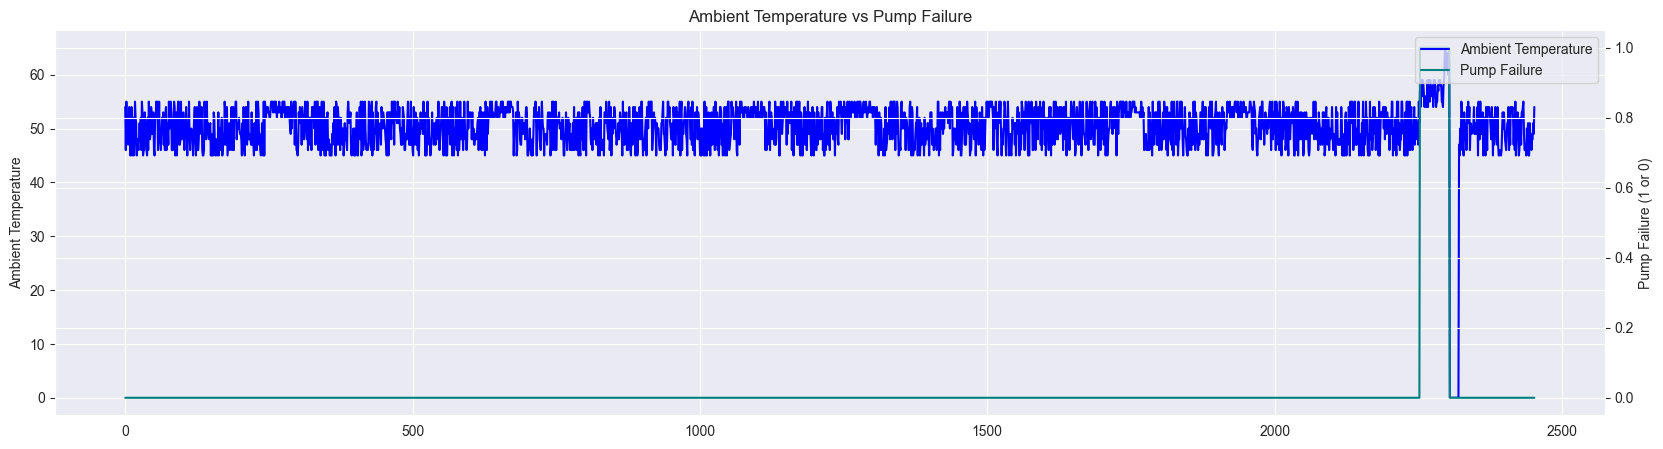

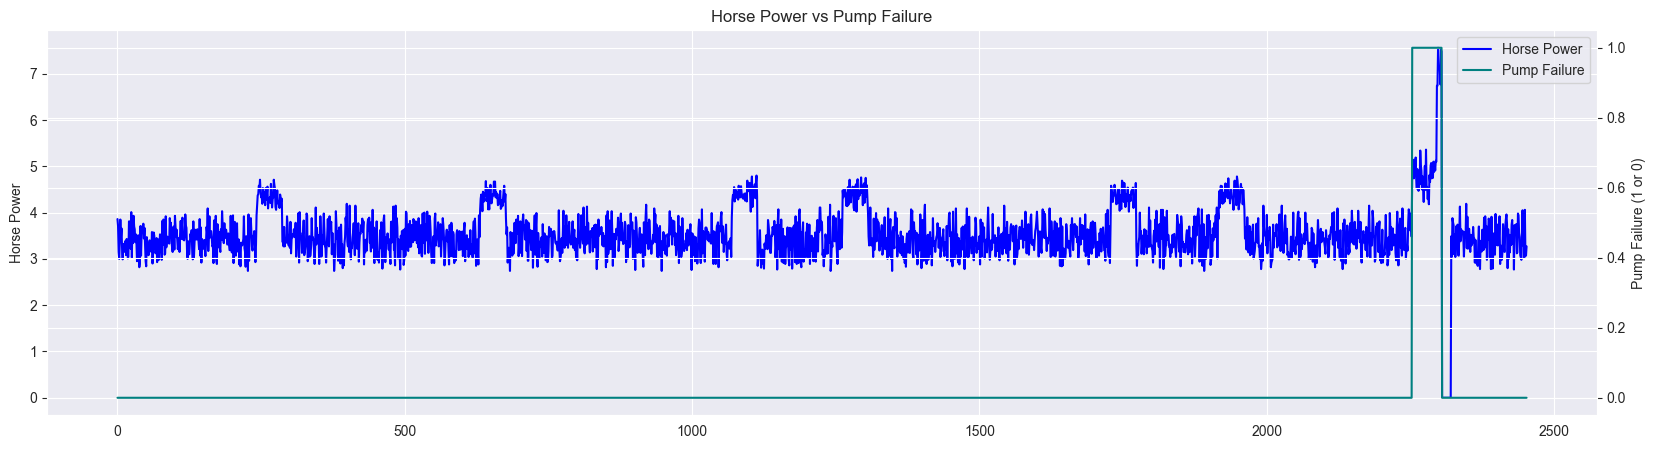

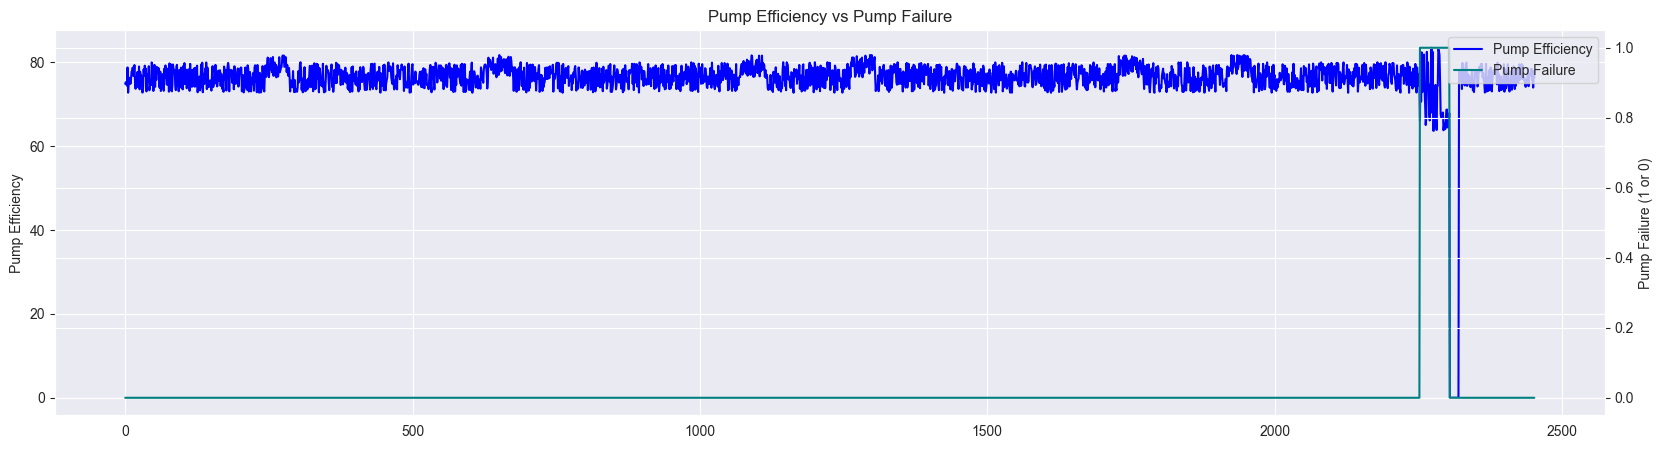

In [46]:
# Create list of numerical variables excluding the pump failure column
ListOfVariables = dataframe_raw.select_dtypes(include=['float64', 'int64']).columns.tolist()
ListOfVariables.remove('PUMP FAILURE (1 or 0)')

# Create individual plots for each variable
for item in ListOfVariables:
    # Create the first axis with the variable
    first_axis = dataframe_raw[item].plot(color='blue', label=item)
    plt.ylabel(item)
    
    # Create the second axis for pump failure
    second_axis = plt.twinx()
    second_axis.plot(dataframe_raw['PUMP FAILURE (1 or 0)'], color='teal', label='Pump Failure')
    second_axis.set_ylabel('Pump Failure (1 or 0)')
    
    # Add title and legend
    plt.title(f'{item} vs Pump Failure')
    lines1, labels1 = first_axis.get_legend_handles_labels()
    lines2, labels2 = second_axis.get_legend_handles_labels()
    second_axis.legend(lines1 + lines2, labels1 + labels2, loc='upper right')
    plt.show()

<b> Are there any particular trends when looking at the data in this way? Has it made it easier to see which variables *might* be reacting more strongly to the Pump Failure than others? </b> 

Yes, by plotting each variable against pump failure individually, it is easier to notice parameters like Pump Torque Horse Power and Pump Speed seem to spike notably during failure events, which suggests they might be more sensitive indicators of pump issues. This targeted approach definitely makes it easier to see which measurements react more strongly during failures, compared to a cluttered multi-variable line plot.

<h3>  <span style="color:green">This is where we will switch to using the dataframe_stdev </span> </h3>

---

Now that we've iterated through the dataframe_raw, we're going to do a similar analysis but with the dataframe_stdev dataset.

In these next few exercises we'll be seeking to better understand how we make use of Pythons Powerful Inferential Statistics and Plotting libraries to Zoom In on periods of interest that we'd like to examinate further.

We'll first have you prepare the dataframe with the TIMEFRAME (DD/MM/YYYY) column set as the index.

An **index** is used as a unique identifier for each record in the dataset. This is used primarily for JOINING operations (think SQL joins), or in our case, for filtering on a specific time period.

### Step 9: <span style="color:green">Create a Plot for Pump Failures Over a Rolling Time Period</span> 

i) Set the **index of the dataframe_stdev** dataset to the TIMEFRAME (DD/MM/YYYY) attribute.

ii) Using the List_Of_Variables we created in Step 8, Re-plot all the numerical variables in the dataframe_stdev for the following time periods:
     10/12/2014 12:00 to 10/12/2014 14:30.

---

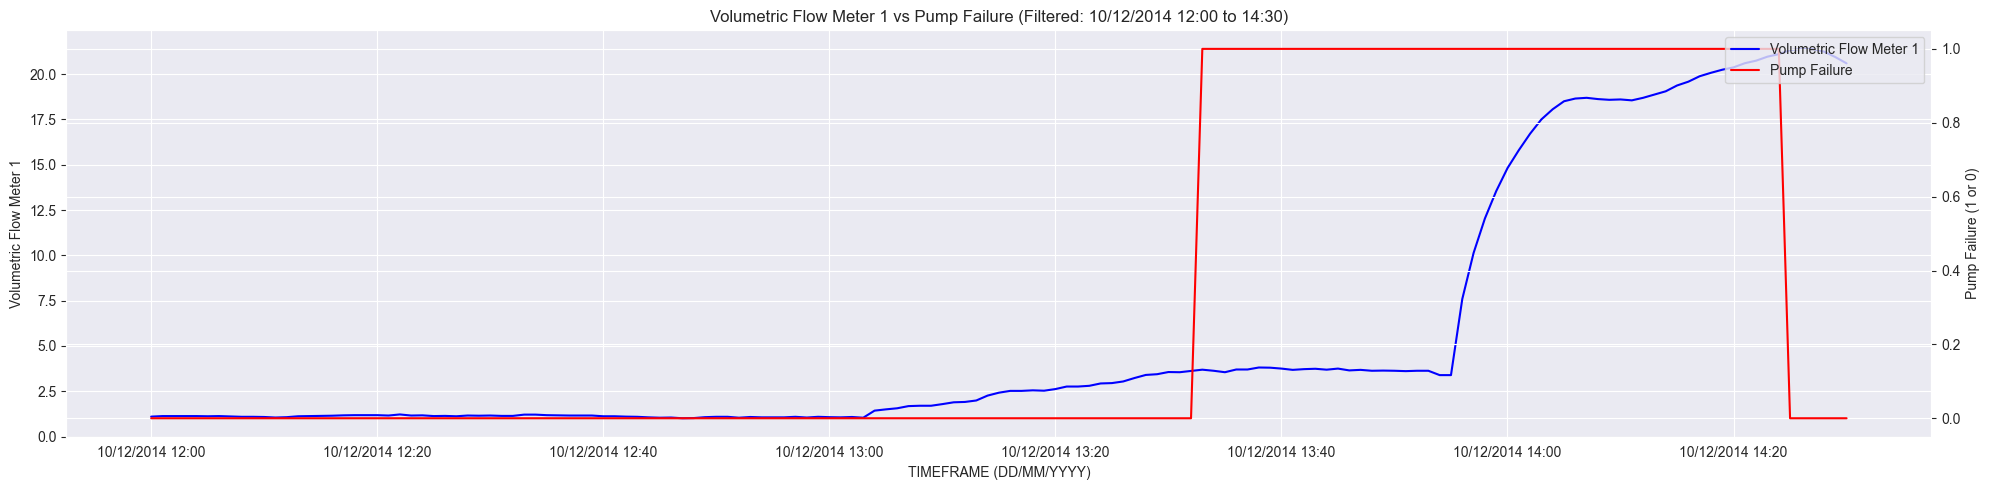

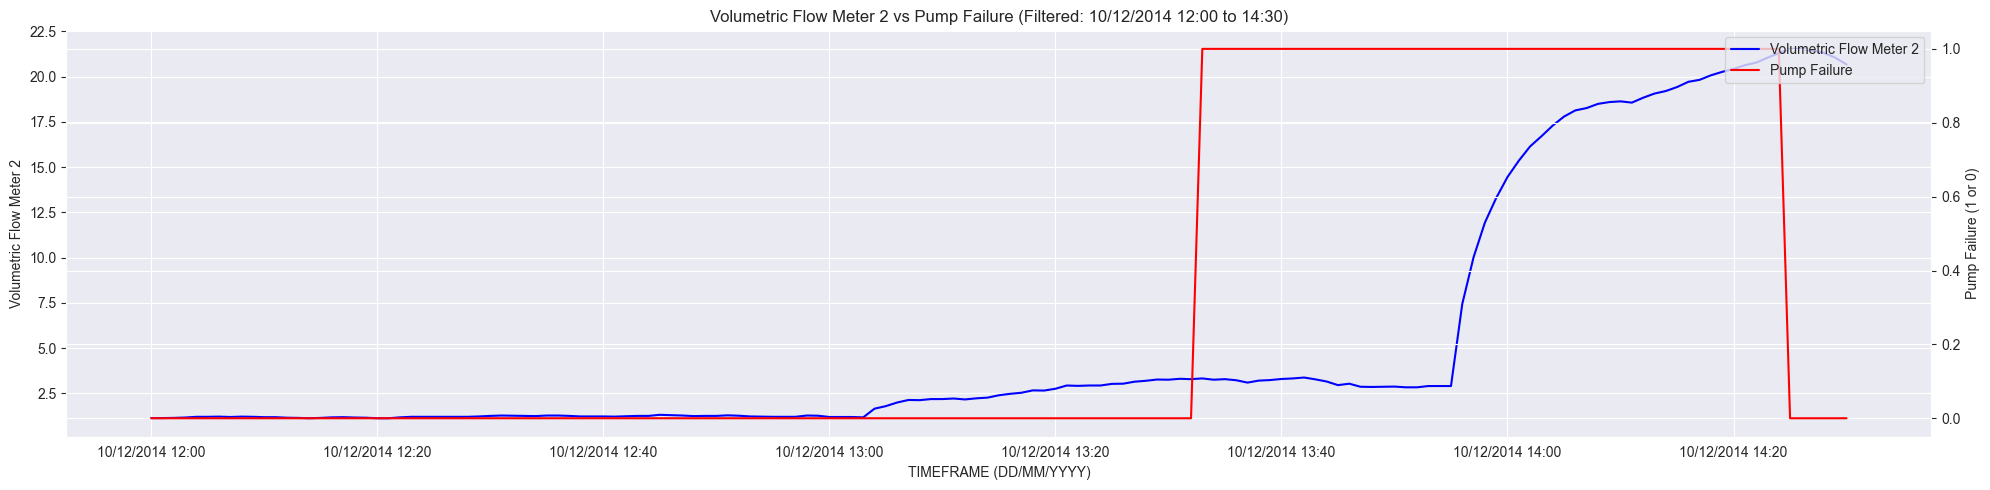

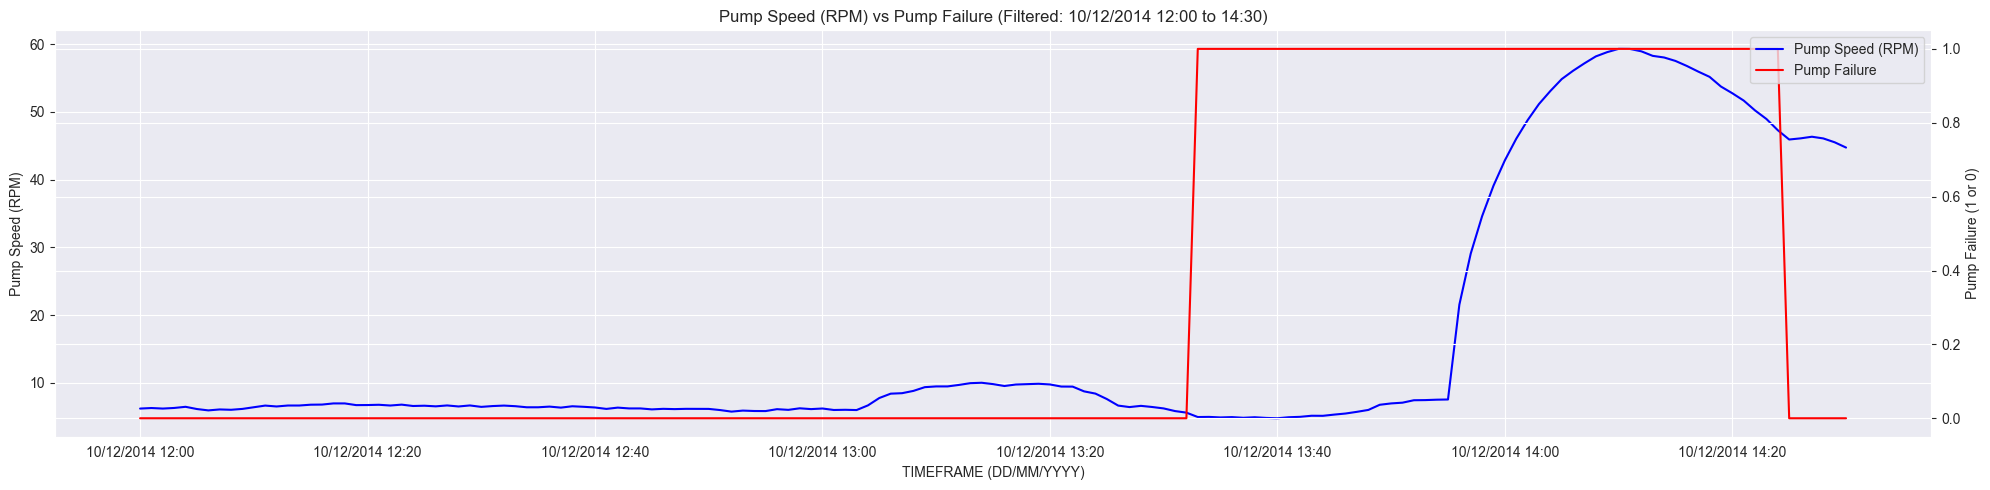

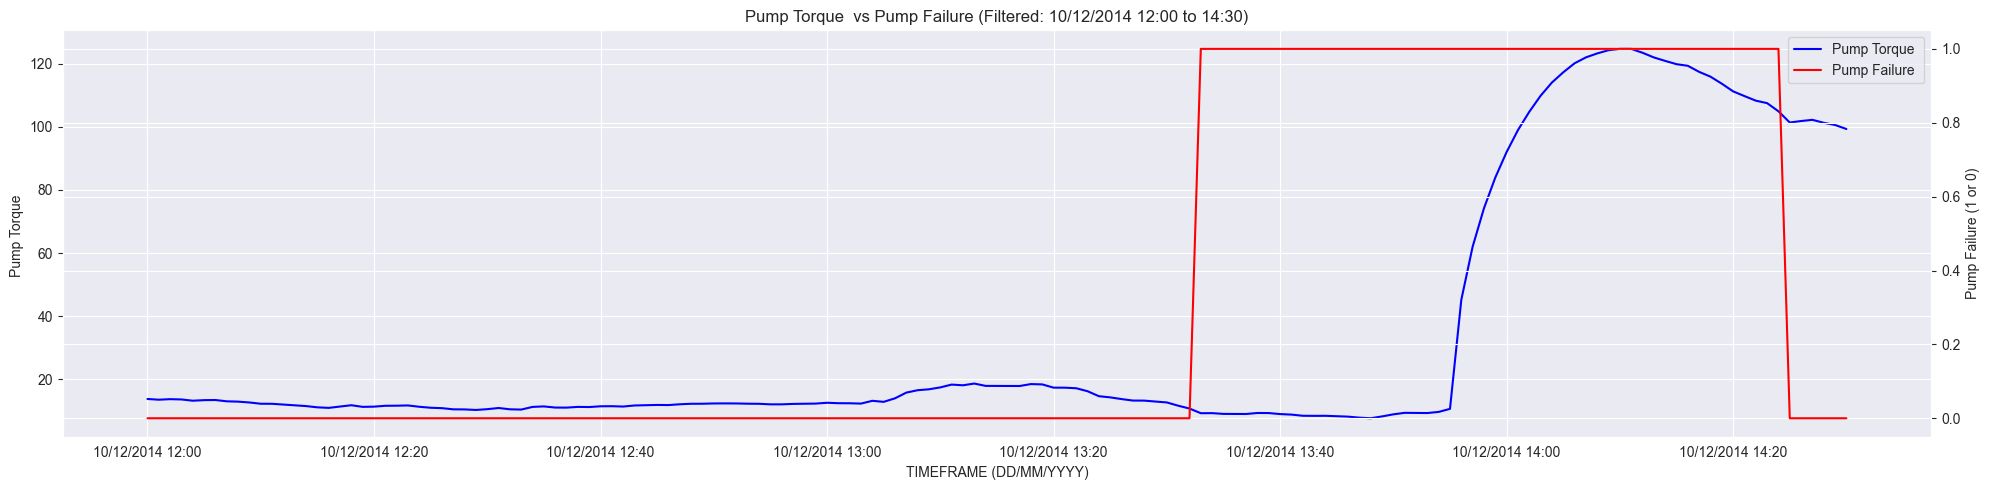

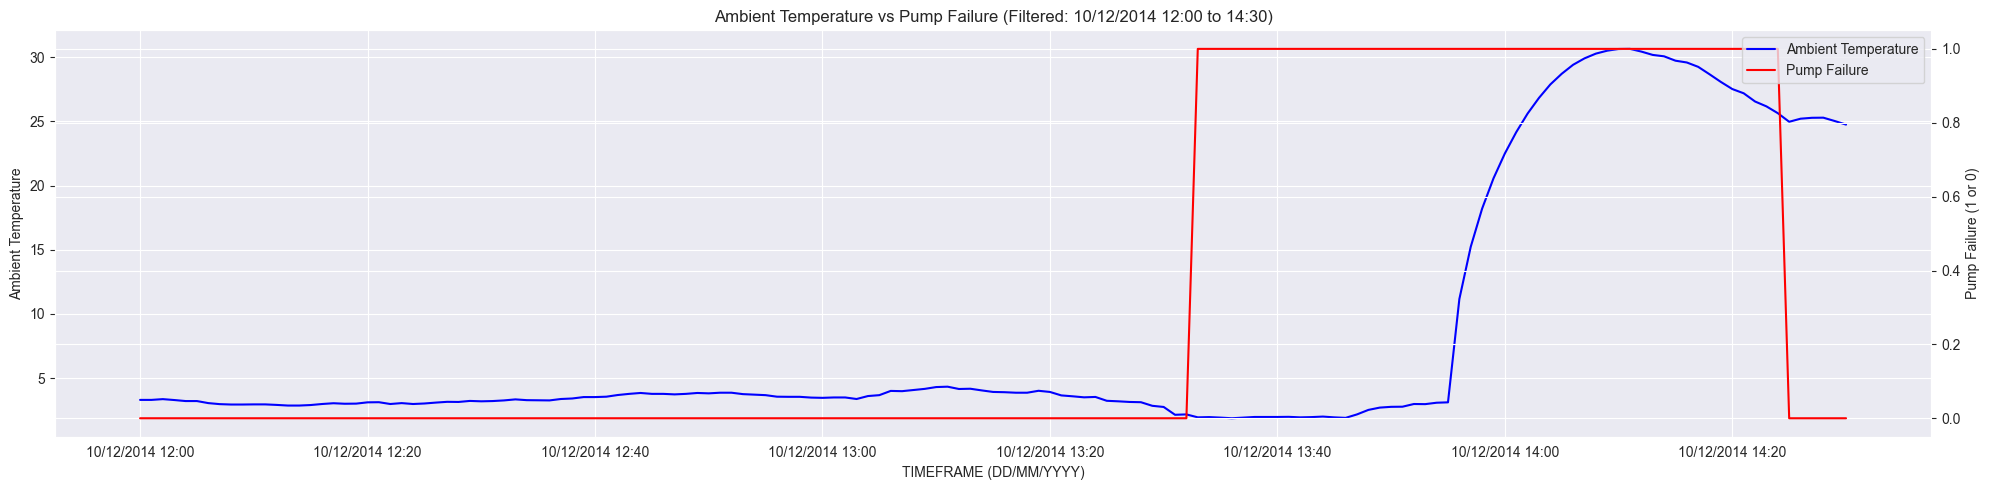

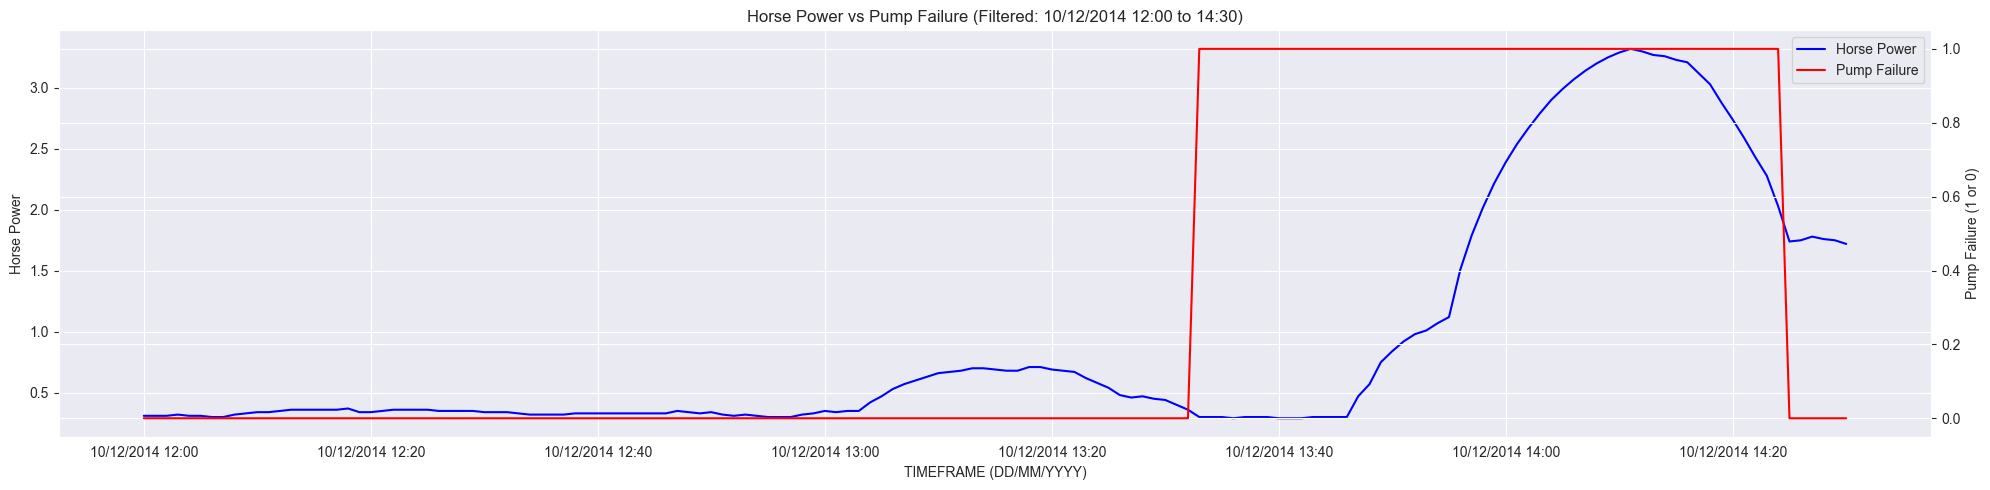

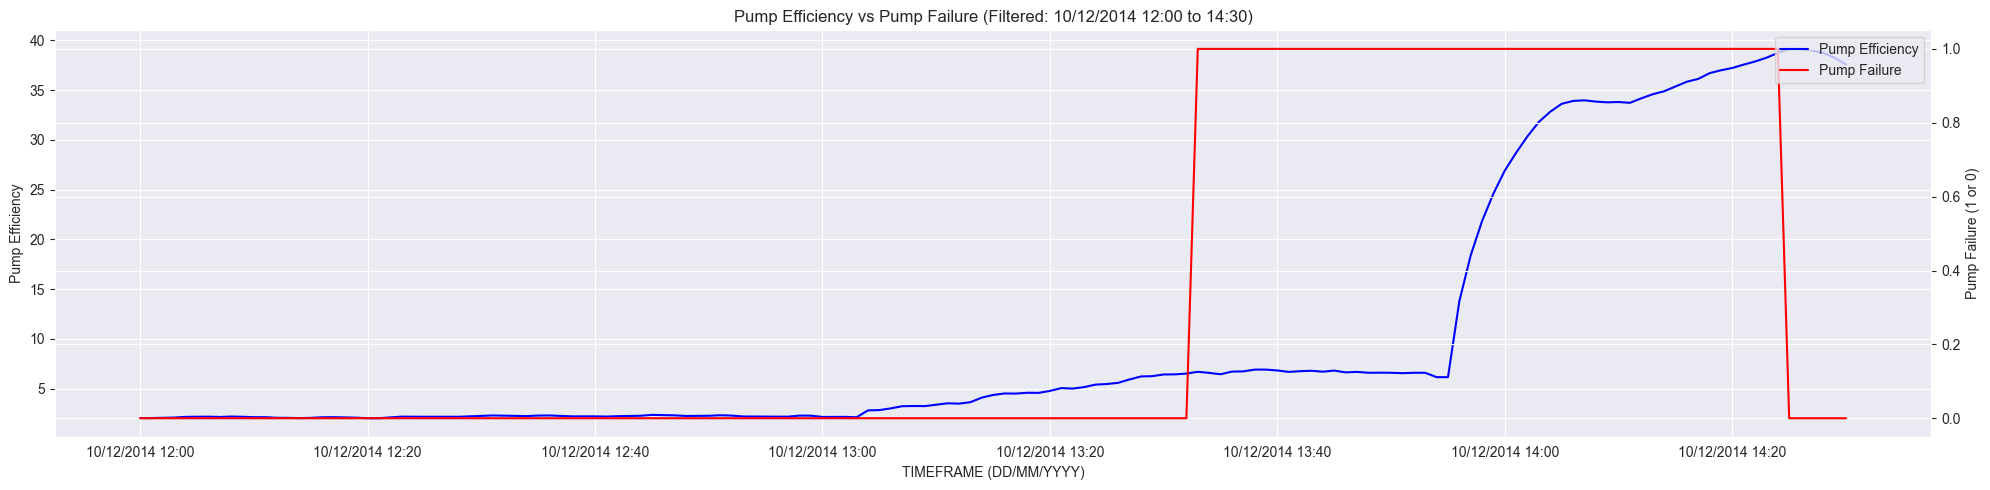

In [47]:
# First, convert the TIMEFRAME index and set it as the index  
dataframe_stdev = pd.read_csv('C:/Users/calej/Desktop/Springboard/SWC_Python_Case_Study/DF_Rolling_Stdev.csv')
df_stdev_index = dataframe_stdev.set_index('TIMEFRAME (DD/MM/YYYY)')

# Filter the dataframe_stdev for records between "10/12/2014 12:00" and "10/12/2014 14:30"  
filtered_stdev = df_stdev_index[(df_stdev_index.index >= "10/12/2014 12:00") & (df_stdev_index.index <= "10/12/2014 14:30")]  

# Create a list of numeric variables excluding the pump failure variable  
ListOfVariables_stdev = filtered_stdev.select_dtypes(include=['float64', 'int64']).columns.tolist()  
ListOfVariables_stdev.remove('PUMP FAILURE (1 or 0)') 
   
# Loop through each variable and plot with dual axes (first axis for the variable, second for pump failure)  
for item in ListOfVariables_stdev:  
     plt.figure(figsize=(20,5))  
     first_axis = filtered_stdev[item].plot(color='blue', label=item)  
     first_axis.xaxis.set_major_locator(plt.MaxNLocator(10))  
     plt.ylabel(item)  
     second_axis = first_axis.twinx()  
     second_axis.plot(filtered_stdev['PUMP FAILURE (1 or 0)'], color='red', label='Pump Failure')  
     second_axis.set_ylabel('Pump Failure (1 or 0)')  
     second_axis.xaxis.set_major_locator(plt.MaxNLocator(10))  
     plt.title(f'{item} vs Pump Failure (Filtered: 10/12/2014 12:00 to 14:30)')  
     # Combine legends from both axes  
     lines1, labels1 = first_axis.get_legend_handles_labels()  
     lines2, labels2 = second_axis.get_legend_handles_labels()  
     second_axis.legend(lines1 + lines2, labels1 + labels2, loc='upper right')  
     plt.tight_layout()  
     plt.show()  

# Part II: <span style="color:green">Inferential Statistical Analysis</span>

When we performed inferential statistics for Southern Water Corp using Excel, we made use of the data analysis package to create a heatmap using the correlation function. The heatmap showed the attributes that strongly correlated to Pump Failure. 

Now, we'll create a heatmap using Seaborn's heatmap function.

### Step 10: <span style="color:purple">Create a Heatmap</span> 
i) Using Seaborn's heatmap function, create a heatmap that clearly shows the correlations (R) for all variables using the dataframe_raw dataset.

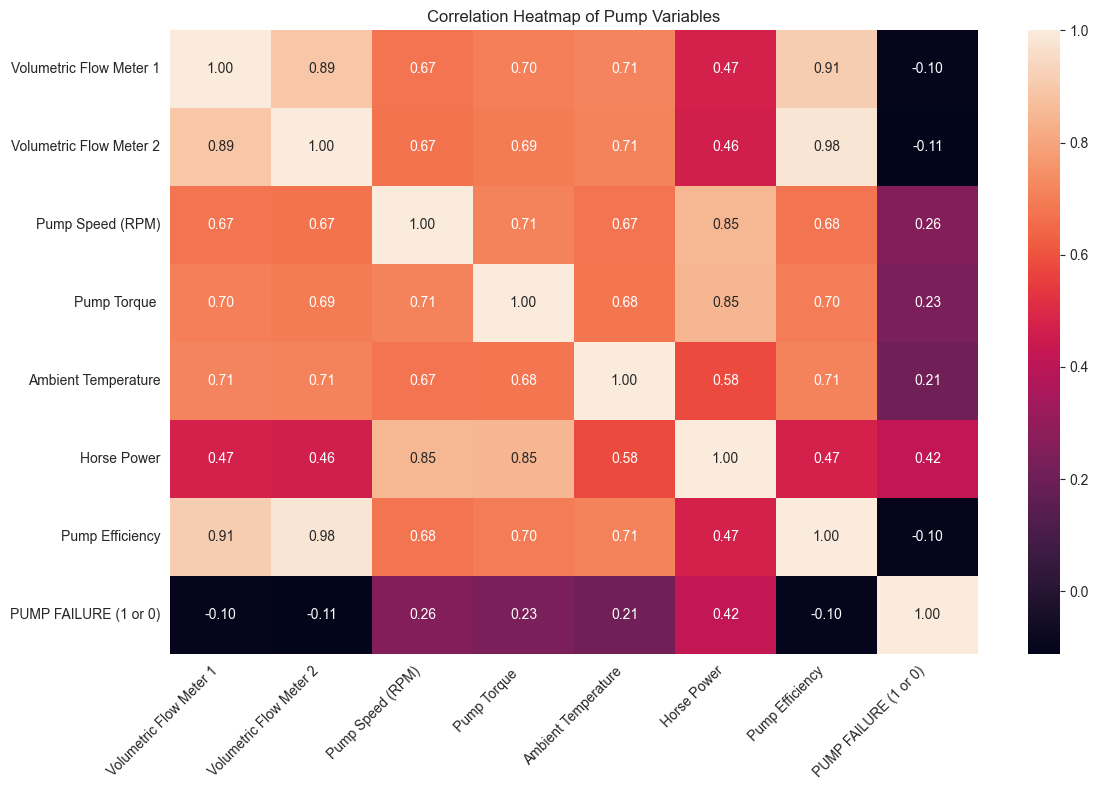

In [48]:
# Remove non-numeric columns for calculations
numeric_columns = dataframe_raw.select_dtypes(include=['float64', 'int64'])

# Create correlation matrix
correlation_matrix = numeric_columns.corr()
plt.figure(figsize=(12, 8))  
# Create heatmap with annotations
sns.heatmap(correlation_matrix, 
            annot=True,  # Show correlation values
            fmt='.2f')  # Show 2 decimal places
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.title('Correlation Heatmap of Pump Variables')
plt.tight_layout()
plt.show()


**Which variables seem to correlate with Pump Failure?**


It appears that Horse Power at 0.42 correlates the strongest with Pump Failure, followed by Pump Speed at 0.26, Pump Torque at 0.23, and Ambient Temperature at 0.21.


### Step 11: <span style="color:purple">Create a Barplot of Correlated Features</span>
<b> i) Using the correlated dataframe we've created earlier, lets create a barplot that shows the correlated features against PUMP FAILURE (1 or 0), in descending order. </b>

C:\Users\calej\AppData\Local\Temp\ipykernel_18552\1915393884.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=failure_corr_sorted.index, y=failure_corr_sorted.values, palette="viridis")


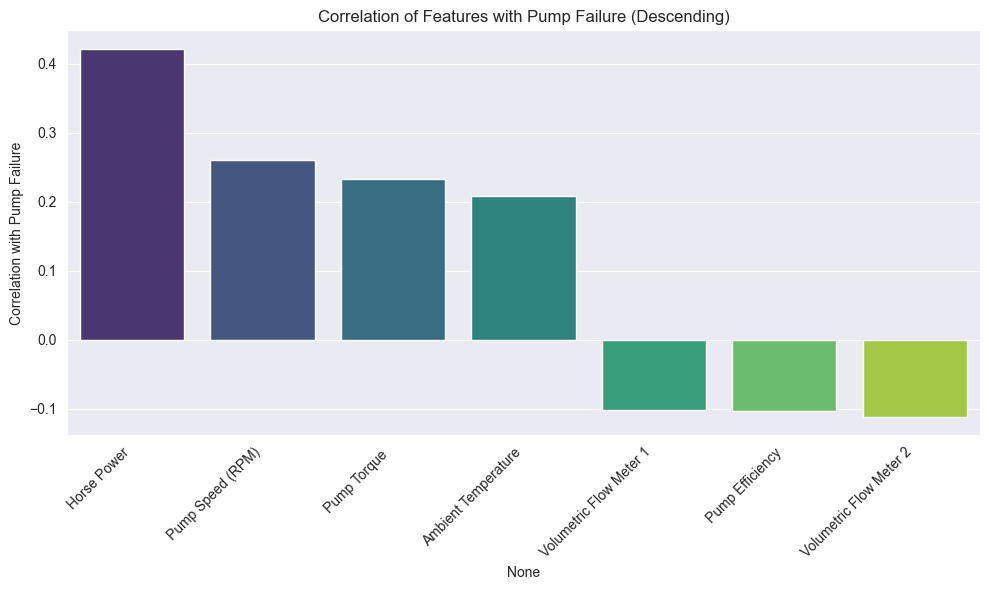

In [49]:
 # Compute the correlation matrix for numeric columns  
 correlation_matrix = numeric_columns.corr()  
   
 # Extract the correlation values for PUMP FAILURE (1 or 0) and drop the self-correlation  
 failure_corr = correlation_matrix['PUMP FAILURE (1 or 0)'].drop('PUMP FAILURE (1 or 0)')  
   
 # Sort the correlations in descending order  
 failure_corr_sorted = failure_corr.sort_values(ascending=False)  
   
 # Create a barplot  
 plt.figure(figsize=(10, 6))  
 sns.barplot(x=failure_corr_sorted.index, y=failure_corr_sorted.values, palette="viridis")  
 plt.title('Correlation of Features with Pump Failure (Descending)')  
 plt.ylabel('Correlation with Pump Failure')  
 plt.xticks(rotation=45, ha='right')  
 plt.tight_layout()  
 plt.show() 

---

### Step 12: <span style="color:purple">Create a Rolling Standard Deviation Heatmap</span> 
Previously, we created a correlation matrix using 'raw' variables. We saw *some* correlations with the raw data but they weren't necessarily as strong as we would have liked. This time, we'll recreate a Heatmap using the dataframe_stdev dataset we had imported in Step Two. 

<b> i) Using Seaborn's heatmap function, create a heatmap that clearly shows the correlations (including R) for all variables using the dataframe_stdev dataset. </b>


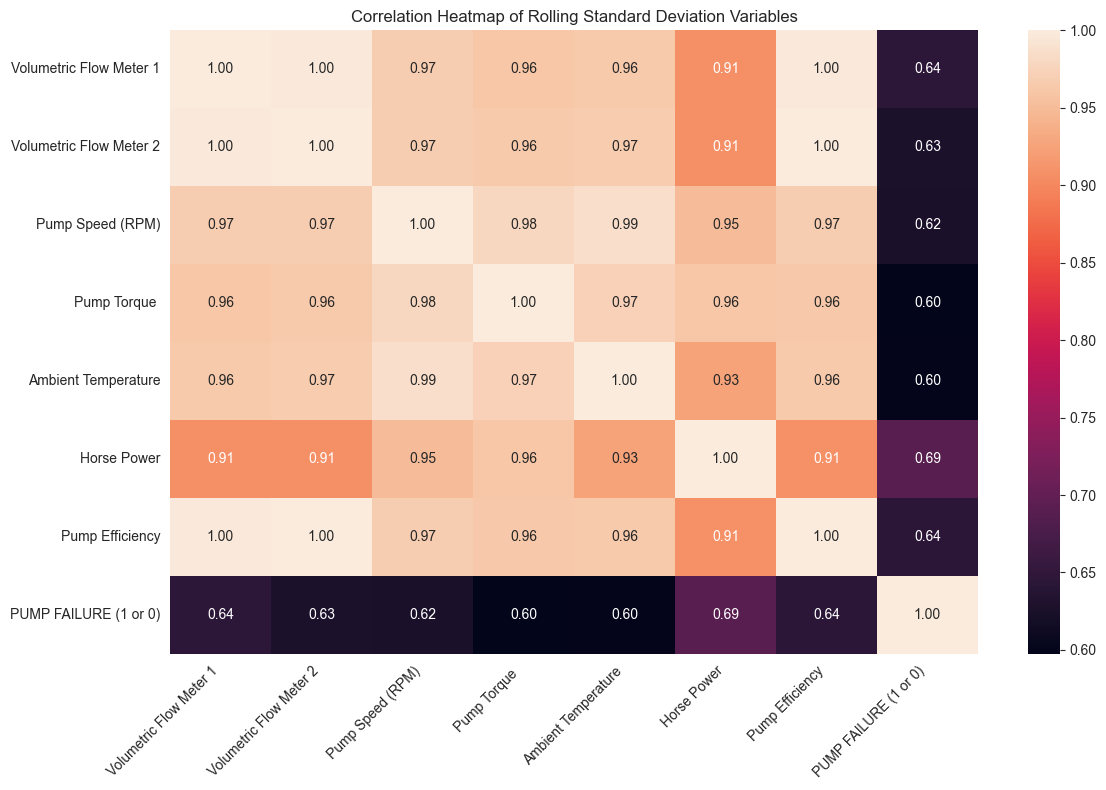

In [50]:
# Remove non-numeric columns for calculations
numeric_columns_stdev = dataframe_stdev.select_dtypes(include=['float64', 'int64'])

# Create correlation matrix
correlation_matrix_stdev = numeric_columns_stdev.corr()

# Create heatmap 
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix_stdev, 
            annot=True,  # Show correlation values
            fmt='.2f')   # Show 2 decimal places

plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.title('Correlation Heatmap of Rolling Standard Deviation Variables')
plt.tight_layout()
plt.show()

<b> Do any variables stand out?</b>

These correlations are much stronger than what we saw in the raw data (where Horse Power had the highest correlation at only 0.42). This suggests that the variability (standard deviation) in these measurements is a better indicator of potential pump failure than their raw values.

### Creating a Multivariate Regression Model


For this step, we'll be using the statsmodel.api library we imported earlier and calling the Ordinary Least Squares Regression to create a multivariate regression model (which is a linear regression model with more than one independent variable).

### Step 13: <span style="color:purple">Use OLS Regression</span> 
<b> i) Using the OLS Regression Model in the statsmodel.api library, lets create a regression equation that models the Pump Failure (Y-Variable) against all our independent variables in the dataframe_raw dataset. </b>

In order to fit a linear regression model with statsmodels.api there are a few steps that need to be taken:

<b> Lets not forget to reimport the dataframes we've previously imported in Step 2 before starting these steps </b> 

    1. Establish two dataframes named, independent_variables and dependent_variables. The independent variables are known as explanatory variables - they help EXPLAIN what we are trying to model. Dependent Variable on the other hand is the variable of interest that we want to MODEL. In this case, the Dependent Variable is Pump Failure (1 or 0).
    
    2. Add a constant to our Independent Dataframe via the following syntax:
    independent_variables = sm.add_constant(independent_variables). This will simply add a constant stream of 1's in a column to our dataframe. This constant is used to account for bias in the model.  
    
    3. Store and Fit your model with the below syntax:
    regression_model = sm.OLS(dependent_variable,independent_variable).fit() 
    
    4. Print the regression_model.summary() to view the Regression Statistics 


<b> ii) Repeat i) but this time use the dataframe_stdev we imported previously.</b>

Repeat the same steps as we have done in i) only you will be changing the dataset from dataset_raw to dataset_stdev. 


In [51]:
dataframe_raw = pd.read_csv('C:/Users/calej/Desktop/Springboard/SWC_Python_Case_Study/DF_Raw_Data.csv')

# Model 1: Using Raw Data
# Remove non-numeric columns and separate dependent and independent variables
numeric_columns_raw = dataframe_raw.select_dtypes(include=['float64', 'int64'])
independent_variables_raw = numeric_columns_raw.drop('PUMP FAILURE (1 or 0)', axis=1)
dependent_variable_raw = numeric_columns_raw['PUMP FAILURE (1 or 0)']

# Add constant to independent variables
independent_variables_raw = sm.add_constant(independent_variables_raw)

# Fit the model
regression_model_raw = sm.OLS(dependent_variable_raw, independent_variables_raw).fit()

print("Model 1: Raw Data Regression Results")
print("====================================")
print(regression_model_raw.summary())

Model 1: Raw Data Regression Results
                              OLS Regression Results                             
Dep. Variable:     PUMP FAILURE (1 or 0)   R-squared:                       0.362
Model:                               OLS   Adj. R-squared:                  0.360
Method:                    Least Squares   F-statistic:                     197.9
Date:                   Tue, 15 Apr 2025   Prob (F-statistic):          5.58e-233
Time:                           13:33:05   Log-Likelihood:                 1823.0
No. Observations:                   2453   AIC:                            -3630.
Df Residuals:                       2445   BIC:                            -3583.
Df Model:                              7                                         
Covariance Type:               nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------

In [52]:
#Dataframe_Stdev
dataframe_stdev = pd.read_csv('C:/Users/calej/Desktop/Springboard/SWC_Python_Case_Study/DF_Rolling_Stdev.csv')

# Model 2: Using Rolling Standard Deviation Data
# Remove non-numeric columns and separate dependent and independent variables
numeric_columns_stdev = dataframe_stdev.select_dtypes(include=['float64', 'int64'])
independent_variables_stdev = numeric_columns_stdev.drop('PUMP FAILURE (1 or 0)', axis=1)
dependent_variable_stdev = numeric_columns_stdev['PUMP FAILURE (1 or 0)']

# Add constant to independent variables
independent_variables_stdev = sm.add_constant(independent_variables_stdev)

# Fit the model
regression_model_stdev = sm.OLS(dependent_variable_stdev, independent_variables_stdev).fit()

print("Model 2: Rolling Standard Deviation Data Regression Results")
print("========================================================")
print(regression_model_stdev.summary())

Model 2: Rolling Standard Deviation Data Regression Results
                              OLS Regression Results                             
Dep. Variable:     PUMP FAILURE (1 or 0)   R-squared:                       0.778
Model:                               OLS   Adj. R-squared:                  0.778
Method:                    Least Squares   F-statistic:                     1225.
Date:                   Tue, 15 Apr 2025   Prob (F-statistic):               0.00
Time:                           13:33:05   Log-Likelihood:                 3117.4
No. Observations:                   2452   AIC:                            -6219.
Df Residuals:                       2444   BIC:                            -6172.
Df Model:                              7                                         
Covariance Type:               nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
----------------------------

<h4> <b> Compare the Models we've created and observe the R Squared displayed for each model - which model seems better and why? </b> 


The rolling standard deviation model performs significantly better with an R-squared of 0.778, meaning it explains about 78% of the variance in pump failures, compared to only 36% explained by the raw data model. This suggests that the variability (standard deviation) in pump measurements is a much better predictor of pump failures than the raw measurements themselves.

### Step 14: <span style="color:purple">Analysis of Coefficients </span>

We've now identified that *one* of our regressive models has a better fit than the previous model.

Using this model, we want to **extract** the co-efficients to better understand the variables that display the largest *absolute* rate of change with respect to Pump Failure. We'll use the co-efficients to better assess this from an *absolute* rate of change perspective. (i.e. Which variables spike the most in relation to Pump Failure?)

<b> i) Using the .params method, extract the Coefficients from our regression_model and create a bar plot that identifies which coefficients react most strongly with respect to Pump Failure. Which three (3) variables seem to showcase the
strongest 'relationship' with respect to Pump Failure? </b>


C:\Users\calej\AppData\Local\Temp\ipykernel_18552\2556658580.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=coefficients_sorted.index, y=coefficients_sorted.values, palette="viridis")


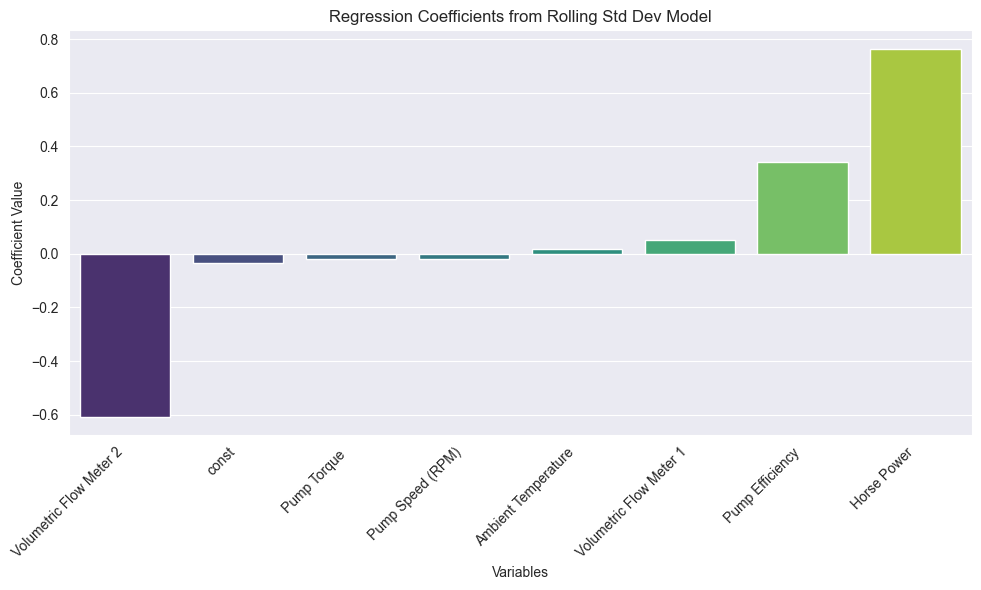

The top 3 variables with the strongest relationship (by absolute coefficient value) are: Horse Power, Pump Efficiency, then Volumetric Flow Meter 1.


In [53]:
# Extract coefficients from the rolling standard deviation regression model  
coefficients = regression_model_stdev.params  

# Sort coefficients in ascending order  
coefficients_sorted = coefficients.sort_values()  
   
# Create a bar plot of the coefficients  
plt.figure(figsize=(10, 6))  
sns.barplot(x=coefficients_sorted.index, y=coefficients_sorted.values, palette="viridis")  
plt.title("Regression Coefficients from Rolling Std Dev Model")  
plt.xlabel("Variables")  
plt.ylabel("Coefficient Value")  
plt.xticks(rotation=45, ha='right')  
plt.tight_layout()  
plt.show()  
   
print("The top 3 variables with the strongest relationship (by absolute coefficient value) are: Horse Power, Pump Efficiency, then Volumetric Flow Meter 1.") 


### Step 15: <span style="color:purple">Validate Predictions</span> 

Now it's time for us to <b> validate our predictions. </b>
    
<b> 
i) Create a new column in the dataframe_stdev, called, 'Prediction'. 
    
ii) Use the regression equation we created in the previous step and apply the .predict() function to the independent variables in the dataframe_stdev dataset so you get a column full of our regressive predictions.
    
iii) Create a Dual-Axis Plot with the following axes items: <p>
    
        Axes One would contain: Volumetric Flow Meter 2, Pump Efficiency and Horse Power 
        Axes two would contain: Pump Failure (1 or 0) and Prediction
</b>

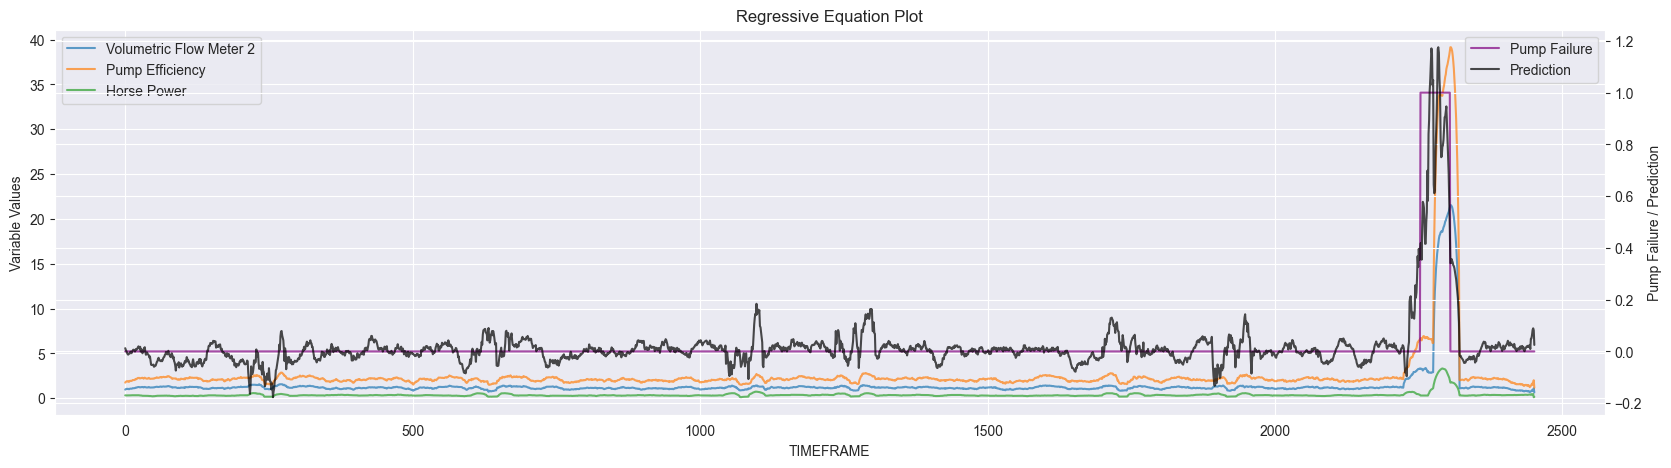

In [54]:
# Create predictions using the regression model  
dataframe_stdev['Prediction'] = regression_model_stdev.predict(independent_variables_stdev)  
   
# First axis for Volumetric Flow Meter 2, Pump Efficiency, and Horse Power  
ax1 = plt.gca()  
ax1.plot(dataframe_stdev['Volumetric Flow Meter 2'], label='Volumetric Flow Meter 2', alpha=0.7)  
ax1.plot(dataframe_stdev['Pump Efficiency'], label='Pump Efficiency', alpha=0.7)  
ax1.plot(dataframe_stdev['Horse Power'], label='Horse Power', alpha=0.7)   
ax1.set_xlabel('TIMEFRAME')  
ax1.set_ylabel('Variable Values')  
ax1.legend(loc='upper left')  
   
# Second axis for Pump Failure and Prediction  
ax2 = ax1.twinx()  
ax2.plot(dataframe_stdev['PUMP FAILURE (1 or 0)'], color='purple', label='Pump Failure', alpha=0.7)  
ax2.plot(dataframe_stdev['Prediction'], color='black', label='Prediction', alpha=0.7)  
ax2.set_ylabel('Pump Failure / Prediction')  
ax2.legend(loc='upper right')  
   
plt.title('Regressive Equation Plot')  
plt.show()  

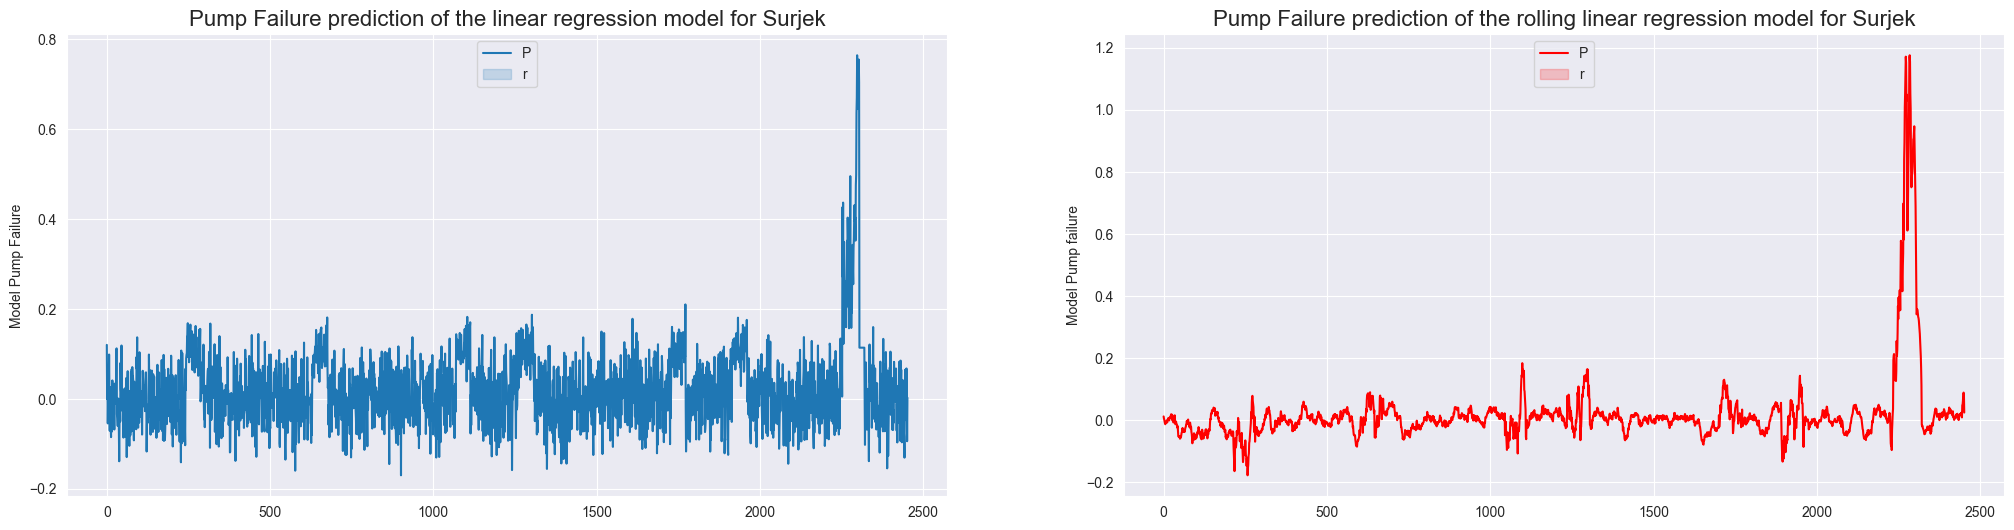

In [55]:
# i. Predict both models  to see whether or not our model 'picks' up the Pump Failure Event.
predict1=regression_model_raw.predict(independent_variables_raw)
predict2=regression_model_stdev.predict(independent_variables_stdev)

# ii. Plot the rolling linear regression equation against the attribute 'PUMP FAILURE (1 or 0)'
plt.figure(figsize=(25,6))
plt.subplot(1, 2, 1)
sns.lineplot(data=predict1)
plt.title('Pump Failure prediction of the linear regression model for Surjek', fontsize=16)
plt.ylabel('Model Pump Failure')
plt.legend('Prediction', loc='upper center')
plt.subplot(1, 2, 2)
sns.lineplot(data=predict2, color='red')
plt.title('Pump Failure prediction of the rolling linear regression model for Surjek', fontsize=16)
plt.legend('Prediction', loc='upper center')
plt.ylabel('Model Pump failure')
plt.show()

<h3> Thank you!</h3>